# Exploratory Data Analysis - Retail Store

![](https://images.unsplash.com/photo-1472851294608-062f824d29cc?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1170&q=80)


# Introduction

## About -  Dataset

In this project, we analyze a dataset that contains records of sales orders from a retail store in the United States. The dataset consists of 9994 records with 13 attributes (columns or features).

Each record (row) represents a sales order made by a retail store which has 13 attributes, and each attribute (column) represents information about the sales order including shipment mode, type of customer, location of customer, product quantity, selling price, discount, and profit amount. 

**`A sales order is a document generated by a seller for its internal use in processing a customer order.`**


## About - Project
This Exploratory Data Analysis project is part of the `Data Science and Business Analytics` internship (GRIP) program provided by [The Sparks Foundation](https://internship.thesparksfoundation.info/#grip).  

Exploratory Data Analysis (EDA) is a process of analyzing a dataset and synthesizing the key insights and characteristics of the data. It's one of the first steps in a Data Science Project to gain a deeper understanding of the data.



## Dataset - Source

The dataset is provided by `The Sparks Foundation` as part of `Task #3` in the GRIP December-2021 Program.

Please [click here](https://drive.google.com/file/d/1lV7is1B566UQPYzzY8R2ZmOritTW299S/view) to download the dataset.

## Download the Dataset

There are several options for getting the dataset into Jupyter:

- Download the CSV manually and upload it via Jupyter's GUI

- Use the `urlretrieve` function from the `urllib.request` to download CSV files from a raw URL

- Use a helper library, e.g., `opendatasets`, which contains a collection of curated datasets and provides a helper function for direct download.

Initially, I downloaded the CSV file dataset manually. Later, I uploaded the same dataset to my Github profile, to fetch the dataset directly with just few lines of code (using `urllib.request.urlretrieve` function), just for my convenience.

Let's assign github raw url of the dataset (which is already downloaded manually) to the variable named `dataset_url`.

In [1]:
#assign the dataset url to a variable
dataset_url = "https://raw.githubusercontent.com/lafirm/datasets/main/SampleSuperstore.csv"

In [2]:
#import urlretrieve function to download the dataset 
from urllib.request import urlretrieve
#name the file as retail_store_dataset.csv
urlretrieve(dataset_url, 'retail_store_dataset.csv')

('retail_store_dataset.csv', <http.client.HTTPMessage at 0x7fccbc74f760>)


We downloaded the CSV file (dataset) using `urlretrieve` function from `urllib.request` module. And we named it as `retail_store_dataset.csv`.

Let's check whether the dataset was downloaded into the current working directory using `listdir()` function from os module.

In [3]:
import os #import os module to work with files and directory 

In [4]:
os.listdir() #to view list of files 

['.bash_logout',
 '.profile',
 '.bashrc',
 '.ipynb_checkpoints',
 '.ipython',
 '.local',
 'retail-store-analysis.ipynb',
 '.cache',
 '.jovianrc',
 'retail_store_dataset.csv',
 '.jupyter',
 '.jovian',
 '.config',
 '.conda',
 '.wget-hsts',
 '.git',
 'work',
 '.npm']

`os.listdir()` function helps us to fetch the list of files in a directory by specifying directory name as an argument. In the absence of arguments, argument value defaults to current working directory.

We can clearly see that our required file has now been downloaded and is in the current working directory. 

## Save and upload our notebook

Whether we run this Jupyter notebook online or on our computer, it's essential to save our work from time to time. We can continue working on a saved notebook later or share it with friends and colleagues to let them execute our code. [Jovian](https://jovian.ai/) offers an easy way of saving and sharing our Jupyter notebooks online. So, let's install and import jovian module to save our notebook. 

In [5]:
#to install jovian module
!pip install jovian --upgrade --quiet

In [6]:
import jovian

In [7]:
#assign the name for our project notebook 
project_name = 'retail-store-analysis'

In [8]:
#let's save our notebook
jovian.commit(project = project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "lafirm/retail-store-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/lafirm/retail-store-analysis


'https://jovian.ai/lafirm/retail-store-analysis'

---

# Data Preparation and Cleaning

Let's load the CSV file using the Pandas library. We'll use the name `retail_store_raw_df` for the data frame to indicate this is unprocessed data that we might clean, filter and modify to prepare a data frame ready for analysis. So, we have to extract a copy of data frame and name it as `retail_store_df`. We'll perform data preparation and cleaning operations on `retail_store_df` and leave the raw data frame untouched and unmodified. 


In [9]:
import pandas as pd

In [10]:
#convert the csv file into pandas data frame 
retail_store_raw_df = pd.read_csv('retail_store_dataset.csv')
#let's extract a copy of raw df to keep the raw df unaffected / untouched 
retail_store_df = retail_store_raw_df.copy()
retail_store_df  

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


### Shape and features of the Dataset  

#### Shape

In [11]:
#check the shape of the dataset 
retail_store_df.shape

(9994, 13)

The dataset consists of 9994 rows (records) and 13 columns (features or attributes) 

#### Features (Columns) 
Let's modify the column names of our data frame, just for our convenience. 

In [12]:
#new column names
column_names = ['shipment_mode', 
               'customer_type', 
               'country',
               'city', 
               'state', 
               'postal_code', 
               'region', 
               'category', 
               'sub_category', 
               'sales', 
               'quantity', 
               'discount', 
               'profit']
#to assign new column names to our data frame
retail_store_df.columns = column_names 

In [13]:
#let's check our data frame with new column names
retail_store_df

,shipment_mode,customer_type,country,city,state,postal_code,region,category,sub_category,sales,quantity,discount,profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


As we can clearly see that our data frame contains 9994 rows and 13 columns. Each record represents a sales order made by the retail store which has 13 columns and each column (attribute) of a record represents an information regarding sales order namely mode of shipment, type of customer, location of customer, sales price, discount and profit amount.

Let's create another column for total sales amount and total profit amount sales and profit amount with quantity respectively. 

In [14]:
#create total_sales column by multiplying sales with quantity
retail_store_df['total_sales'] = retail_store_df.sales * retail_store_df.quantity
#create total_profit column by multiplying profit with quantity 
retail_store_df['total_profit'] = retail_store_df.profit * retail_store_df.quantity

Let's use `nunique()` method to find the categories of each categorical column. 

**`nunique() method returns the number of unique values for each column.`**

In [15]:
retail_store_df.nunique()

shipment_mode       4
customer_type       3
country             1
city              531
state              49
postal_code       631
region              4
category            3
sub_category       17
sales            5825
quantity           14
discount           12
profit           7287
total_sales      6425
total_profit     7468
dtype: int64

In [16]:
retail_store_df.shipment_mode.unique(), retail_store_df.country.unique(), retail_store_df.customer_type.unique(), retail_store_df.region.unique(), retail_store_df.category.unique()

(array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
       dtype=object),
 array(['United States'], dtype=object),
 array(['Consumer', 'Corporate', 'Home Office'], dtype=object),
 array(['South', 'West', 'Central', 'East'], dtype=object),
 array(['Furniture', 'Office Supplies', 'Technology'], dtype=object))


The data shows clearly that the retail store operates in the United States which covers most of the country. It has delivered orders to 631 postal codes in 531 cities in 49 states in the country.
Consumer, corporate, and home offices are the main types of customers, and there are four different types of delivery modes, namely First Class, Second Class, Standard Class, and Same Day Delivery.
Only 17 types of products are offered, which are broadly classified as Furniture, Office Supplies and Technology.  

Let's check the column names (features) of our data frame using `columns` function. 

In [17]:
retail_store_df.columns

Index(['shipment_mode', 'customer_type', 'country', 'city', 'state',
       'postal_code', 'region', 'category', 'sub_category', 'sales',
       'quantity', 'discount', 'profit', 'total_sales', 'total_profit'],
      dtype='object')

### Data type of each columns 

Let's check the data type of each column in our data frame using `info()` function from pandas. 

**`info() function in pandas module is used to view some basic information of a data frame like number of rows, columns and data types.`**

In [18]:
retail_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   shipment_mode  9994 non-null   object 
 1   customer_type  9994 non-null   object 
 2   country        9994 non-null   object 
 3   city           9994 non-null   object 
 4   state          9994 non-null   object 
 5   postal_code    9994 non-null   int64  
 6   region         9994 non-null   object 
 7   category       9994 non-null   object 
 8   sub_category   9994 non-null   object 
 9   sales          9994 non-null   float64
 10  quantity       9994 non-null   int64  
 11  discount       9994 non-null   float64
 12  profit         9994 non-null   float64
 13  total_sales    9994 non-null   float64
 14  total_profit   9994 non-null   float64
dtypes: float64(5), int64(2), object(8)
memory usage: 1.1+ MB



shipment_mode, customer_type, country, state, etc. have object data types, so they're categorical columns. sales, discount, and profit have float data types, and quantity and postal_code have integer data types. 
The data type for all columns is correct except for `postal_code`. Though `postal_code` is a numeric value, it falls under the category type, so we need to change its data type. 

In [19]:
#modify postal_code data type 
retail_store_df.postal_code = retail_store_df.postal_code.astype(object)

In [20]:
#modified successfully 
retail_store_df.postal_code.dtype

dtype('O')

### Checking for missing values  

`isna().any()` function returns `True` if the data frame series object includes a null value (Nan) and `False` if there is no null value.

In [21]:
retail_store_df.isna().any()

shipment_mode    False
customer_type    False
country          False
city             False
state            False
postal_code      False
region           False
category         False
sub_category     False
sales            False
quantity         False
discount         False
profit           False
total_sales      False
total_profit     False
dtype: bool

Using the above result, it is clear that there are no null values in the data frame. If the number of columns is limited, we can also check whether the column has a null value or not by using `info()` method.

If we use `isna.sum()` method, it will return number of null values present in the data frame. 

### Descriptive summary of the Dataset 

`describe()` function is used to find some basic statistical information regarding numeric columns in a pandas data frame. 

In [22]:
retail_store_df.describe()

,sales,quantity,discount,profit,total_sales,total_profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896,1149.495905,143.128735
std,623.245101,2.225110,0.206452,234.260108,3898.666090,1388.955607
min,0.444000,1.000000,0.000000,-6599.978000,0.444000,-32999.890000
25%,17.280000,2.000000,0.000000,1.728750,48.693500,3.208825
50%,54.490000,3.000000,0.200000,8.666500,183.680000,26.371800
75%,209.940000,5.000000,0.200000,29.364000,763.201500,114.702075
max,22638.480000,14.000000,0.800000,8399.976000,135830.880000,64302.810000


The output above clearly shows that the maximum sales done by the retail store is `135830.88 USD` per order and the average is `1149.5 USD` per order, which is much less than the maximum. 

The maximum quantity of the product delivered is 14 per sales order and the minimum is 1. Since, we know that minimum quantity value cannot be less than 1, likewise we can study the discount information. 

It is important to look at the profit potential of the retail store. It is unfortunate that the average profit per order is `143.13 USD` and the maximum profit per order is `64302.81 USD`, whereas they suffered a loss of `33000.0 USD` in a single order, nullifying more than half of the maximum profit amount.



---

# Data Visualization

Data visualization is the graphical representation of data. It involves producing images that helps us to easily understand the complex relationships between the data. 

Let's install and import `seaborn` library as `sns` and `matplotlib.pyplot` module as `plt` to perform some visualization operations on our data frame to understand the distribution and relationships of attributes.

In [23]:
#install matplotlib and seaborn 
!pip install matplotlib seaborn --upgrade --quiet 

In [24]:
#import seaborn and matplotlib.pyplot 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
#set some default style for our graphs
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = 'white'

We will analyze each categorical variable (column) to find out which category plays the major role and the minor role in our retail store business. 

### Modes of Shipment

Let's start our analysis with shipment mode by using `countplot()` function. 

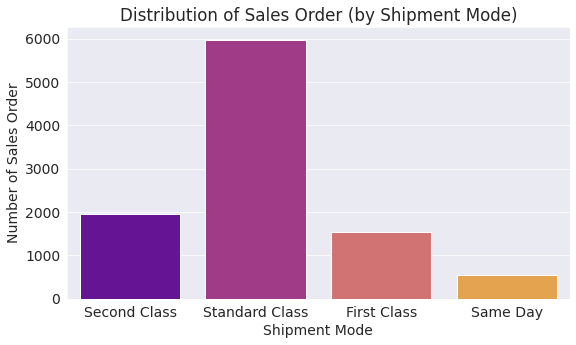

In [25]:
plt.title("Distribution of Sales Order (by Shipment Mode)") 
sns.countplot(x = 'shipment_mode', data = retail_store_df, palette ='plasma')
plt.ylabel('Number of Sales Order')
plt.xlabel("Shipment Mode"); 

The most popular mode of shipment chosen by customers is `Standard Class`, while `Same Day` is the least popular. `Standard Class` is the most affordable mode compared to others, as its name implies. It seems that the `Same day` mode would be the most expensive.   


### Customer type 

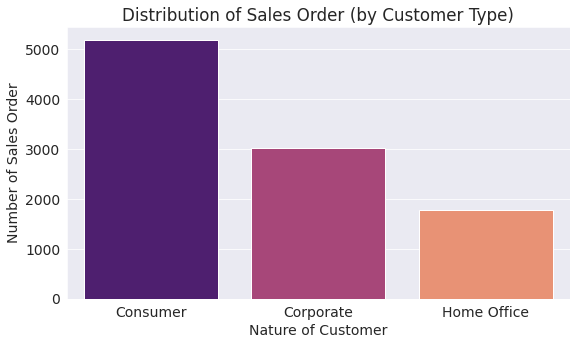

In [26]:
plt.title("Distribution of Sales Order (by Customer Type)")
sns.countplot(x = 'customer_type', data = retail_store_df, palette ='magma')
plt.ylabel('Number of Sales Order')
plt.xlabel("Nature of Customer"); 

The above result indicates that the majority of orders were delivered to `consumers`, followed by `corporate` and `home offices`. 

### City

We'll find out which cities are the top and worst 10 in terms of number of sales order (sales order quantity), sales amount and profit. 

The **`Number of sales orders is the same as the Sales order quantity`** , which indicates how many sales orders a category has, while the **quantity** column in our data frame represents the amount of products in each sales order. 

    Note: Each row represents a sales order


#### Top Cities

Let's have a look at the top performing cities based on the sales order quantity, sales amount and profit amount. 

In [27]:
#top_city_qty means top 10 cities based on sales order quantity 
top_city_qty = retail_store_df.groupby('city').count().sort_values('quantity', ascending = False).head(10)
#top_city_sales means top 10 cities based on sales amount 
top_city_sales = retail_store_df.groupby('city').sum().sort_values('total_sales', ascending = False).head(10)
#top_city_profit means top 10 cities based on profit amount 
top_city_profit = retail_store_df.groupby('city').sum().sort_values('total_profit', ascending = False).head(10)

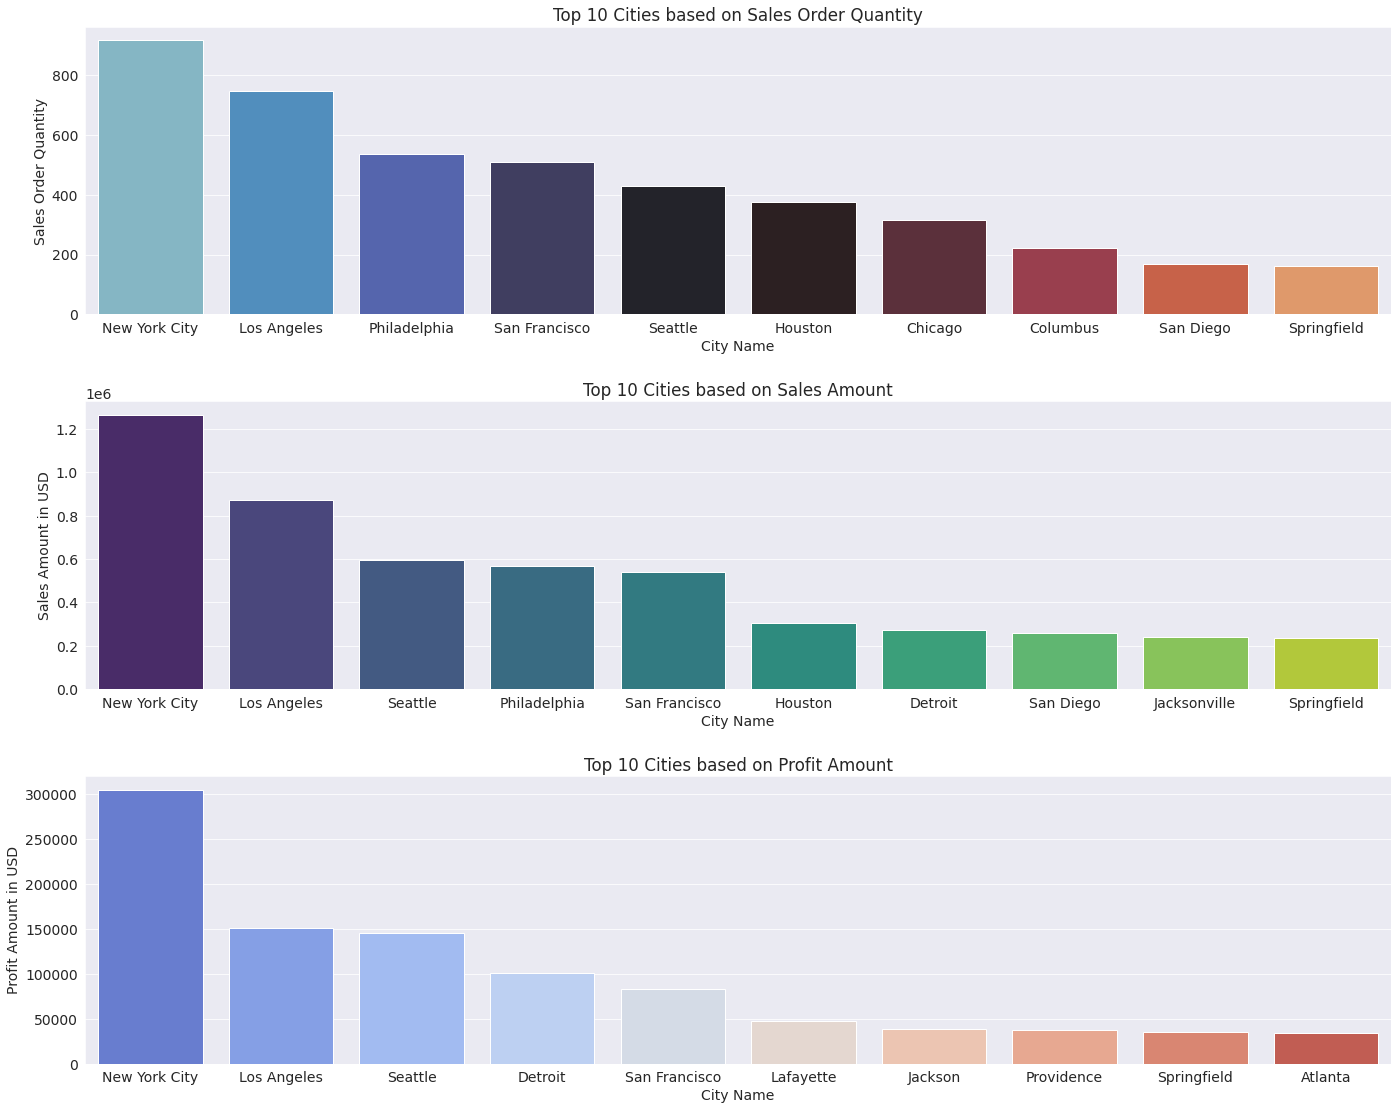

In [28]:
fig, axis = plt.subplots(3,1, figsize=(20, 16))
#axis[0,] for top 10 cities based on sales order quantity
axis[0,].set_title("Top 10 Cities based on Sales Order Quantity")
sns.barplot(x = top_city_qty.index, y = top_city_qty.quantity, ax = axis[0,], palette = 'icefire')
axis[0,].set_ylabel("Sales Order Quantity")
axis[0,].set_xlabel("City Name")

#axis[1,] for top 10 cities based on sales amount
axis[1,].set_title("Top 10 Cities based on Sales Amount")
sns.barplot(x = top_city_sales.index, y = top_city_sales.total_sales, ax = axis[1,], palette ='viridis')
axis[1,].set_ylabel("Sales Amount in USD")
axis[1,].set_xlabel("City Name")

#axis[2,] for top 10 cities based on profit amount 
axis[2,].set_title("Top 10 Cities based on Profit Amount")
sns.barplot(x = top_city_profit.index, y = top_city_profit.total_profit, ax = axis[2,], palette ='coolwarm')
axis[2,].set_ylabel("Profit Amount in USD")
axis[2,].set_xlabel("City Name")


plt.tight_layout(pad=2);


New York City and Los Angeles occupied the top 2 spots, regardless of whether the measurement is based on number of sales or sales amount or profit amount.

Compared to Los Angeles, New York City makes a higher profit percentage, which indicates that there might have been some losses incurred or a lower profit margin. We need to dig deeper to find out what the actual cause is. 

In terms of number of sales, Seattle is ranked 5, but it is ranked 3 on the basis of sales amount and profit amount, which suggests that sales amount has a larger impact on the number of sales. 

Contrary to Seattle, San Francisco ranked 3rd based on Sales order quantity but 5th based on sales amount and profit amount. That demonstrates how much more crucial sales amount and profit margin are for a successful business than sales order quantity (volume). 


#### Worst Cities
Let's have a look at the worst performing cities based on the sales order quantity, sales amount and profit amount. 

In [29]:
#worst_city_qty means worst 10 cities based on sales order quantity 
worst_city_qty = retail_store_df.groupby('city').count().sort_values('quantity', ascending = True).head(10)
#worst_city_sales means worst 10 cities based on sales amount 
worst_city_sales = retail_store_df.groupby('city').sum().sort_values('sales', ascending = True).head(10)
#worst_city_profit means worst 10 cities based on profit amount 
worst_city_profit = retail_store_df.groupby('city').sum().sort_values('profit', ascending = True).head(10)


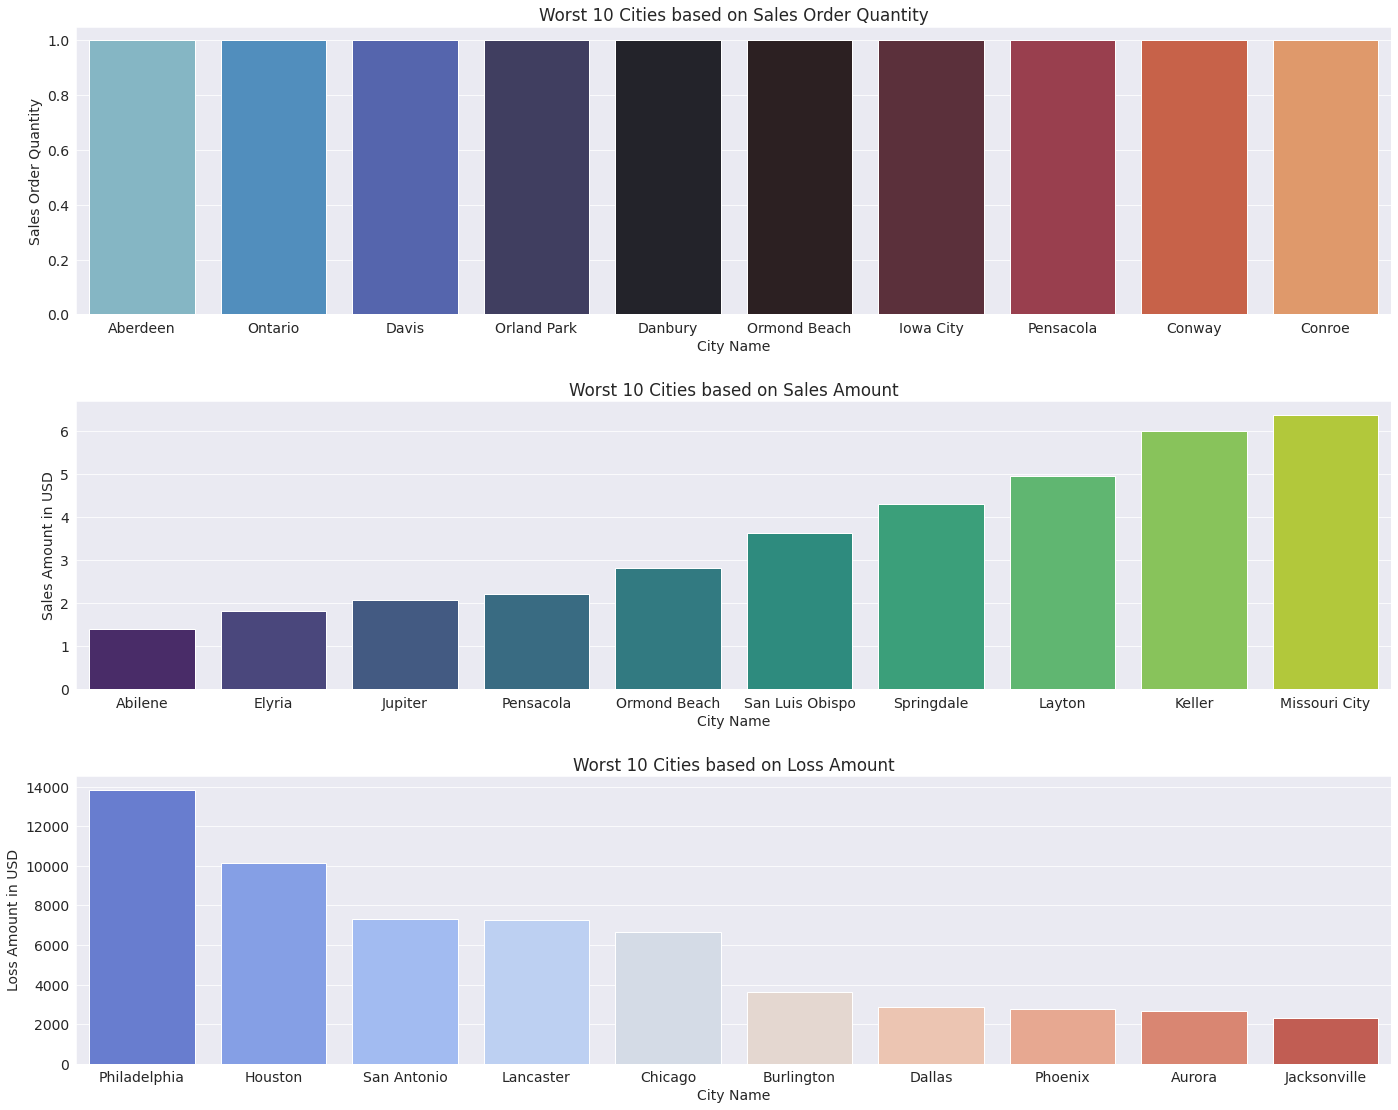

In [30]:
fig, axis = plt.subplots(3,1, figsize=(20, 16))
#axis[0,] for worst 10 cities based on sales order quantity
axis[0,].set_title("Worst 10 Cities based on Sales Order Quantity")
sns.barplot(x = worst_city_qty.index, y = worst_city_qty.quantity, ax = axis[0,], palette = 'icefire')
axis[0,].set_ylabel("Sales Order Quantity")
axis[0,].set_xlabel("City Name")

#axis[1,] for worst 10 cities based on sales amount
axis[1,].set_title("Worst 10 Cities based on Sales Amount")
sns.barplot(x = worst_city_sales.index, y = worst_city_sales.sales, ax = axis[1,], palette ='viridis')
axis[1,].set_ylabel("Sales Amount in USD")
axis[1,].set_xlabel("City Name")

#axis[2,] for worst 10 cities based on profit amount 
axis[2,].set_title("Worst 10 Cities based on Loss Amount")
sns.barplot(x = worst_city_profit.index, y = -(worst_city_profit.profit), ax = axis[2,], palette ='coolwarm')
axis[2,].set_ylabel("Loss Amount in USD")
axis[2,].set_xlabel("City Name")


plt.tight_layout(pad=2);


As we can clearly see that most of the cities only have 1 sales order, we need to analyze further to find out how many cities have only 1 order. 

Pensacola and Ormond Beach rank 4 and 5 among the worst 10 cities based on the sales amount, which amount to merely 2.2 to 3 USD. Although many cities had few sales orders, only a few made it into the worst 10 cities based on sales amount.

According to sales amount and profit amount, no cities were common among the worst cities. This means that, even though some cities made great sales, they may have incurred heavy losses due to refunds, warranty claims, and low profit margins. 

#### Cities with least sales order quantity

Let's check the cities with least amount of sales order quantity. 

In [31]:
#cities grouped based on sales order quantity 
cities_qty = retail_store_df.groupby('city').count().sort_values('quantity', ascending = True)
cities_qty = cities_qty[cities_qty.quantity < 50]
cities_qty

,shipment_mode,customer_type,country,state,postal_code,region,category,sub_category,sales,quantity,discount,profit,total_sales,total_profit
city,,,,,,,,,,,,,,
Aberdeen,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Ontario,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Davis,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Orland Park,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Danbury,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lawrence,44,44,44,44,44,44,44,44,44,44,44,44,44,44
Milwaukee,45,45,45,45,45,45,45,45,45,45,45,45,45,45
Fairfield,45,45,45,45,45,45,45,45,45,45,45,45,45,45


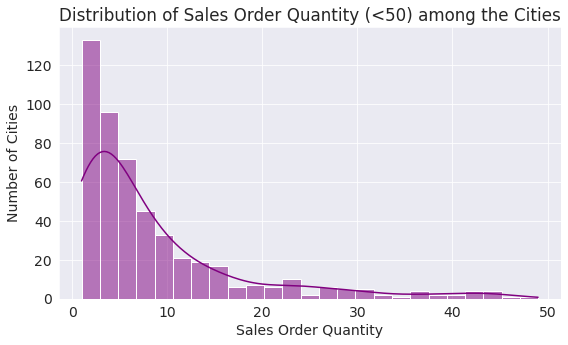

In [32]:
plt.title("Distribution of Sales Order Quantity (<50) among the Cities")
sns.histplot(x = cities_qty.quantity, bins = 25, kde = True, color ='purple')
plt.xlabel("Sales Order Quantity")
plt.ylabel("Number of Cities");

The above output indicates that the number of sales orders is not normally distributed, but right skewed.

In 504 cities, the number of sales order cumulatively was less than 50 per city, while in 360 cities, it was less than 10. The maximum number of cities had only one quantity of sales order (70 cities), and the curve started declining rapidly after six numbers of sales orders. 

### Discount 
Let's check how the discount variable is distributed among the sales orders using `countplot` function.

**`A count plot can be thought of as a histogram across a categorical, instead of numerical variable.`**

Though `discount` column is a numeric value, here we considered `discount` as a categorical variable to determine the distribution of discount value among the sales orders. 

In [33]:
retail_store_df.groupby("discount").count()


,shipment_mode,customer_type,country,city,state,postal_code,region,category,sub_category,sales,quantity,profit,total_sales,total_profit
discount,,,,,,,,,,,,,,
0.00,4798,4798,4798,4798,4798,4798,4798,4798,4798,4798,4798,4798,4798,4798
0.10,94,94,94,94,94,94,94,94,94,94,94,94,94,94
0.15,52,52,52,52,52,52,52,52,52,52,52,52,52,52
0.20,3657,3657,3657,3657,3657,3657,3657,3657,3657,3657,3657,3657,3657,3657
0.30,227,227,227,227,227,227,227,227,227,227,227,227,227,227
0.32,27,27,27,27,27,27,27,27,27,27,27,27,27,27
0.40,206,206,206,206,206,206,206,206,206,206,206,206,206,206
0.45,11,11,11,11,11,11,11,11,11,11,11,11,11,11
0.50,66,66,66,66,66,66,66,66,66,66,66,66,66,66


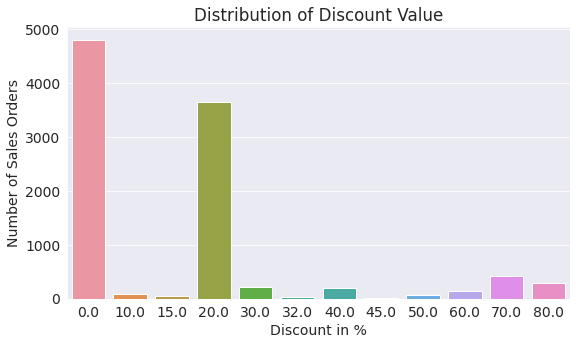

In [34]:
plt.title("Distribution of Discount Value")
sns.countplot(x = (retail_store_df.discount * 100)) 
plt.xlabel("Discount in %")
plt.ylabel("Number of Sales Orders");

From the above, it can be seen that there are only 12 discount values that are distributed among the 9994 sales orders and the discount values (in percentage) are 0,10,15,20,30,32,40,45,50,60,70,80.

Over 4798 sales orders have been discounted using 0% (No discount), which is approximately 48% of all sales orders. The next most commonly used discount value is 20%, which is applied to approximately 37% of all sales orders.
The maximum discount value was 80%, which was applied to only 300 sales orders. 

### State

Let's check the performance of every state based on sales and profit amount in the United States. 

In [35]:
#states_qty means states based on sales order quantity 
states_qty = retail_store_df.groupby('state').count().sort_values('quantity', ascending = False)
#states_sales means states based on sales amount 
states_sales = retail_store_df.groupby('state').sum().sort_values('total_sales', ascending = False)
#states_profit means states based on profit amount 
states_profit = retail_store_df.groupby('state').sum().sort_values('total_profit', ascending = False)

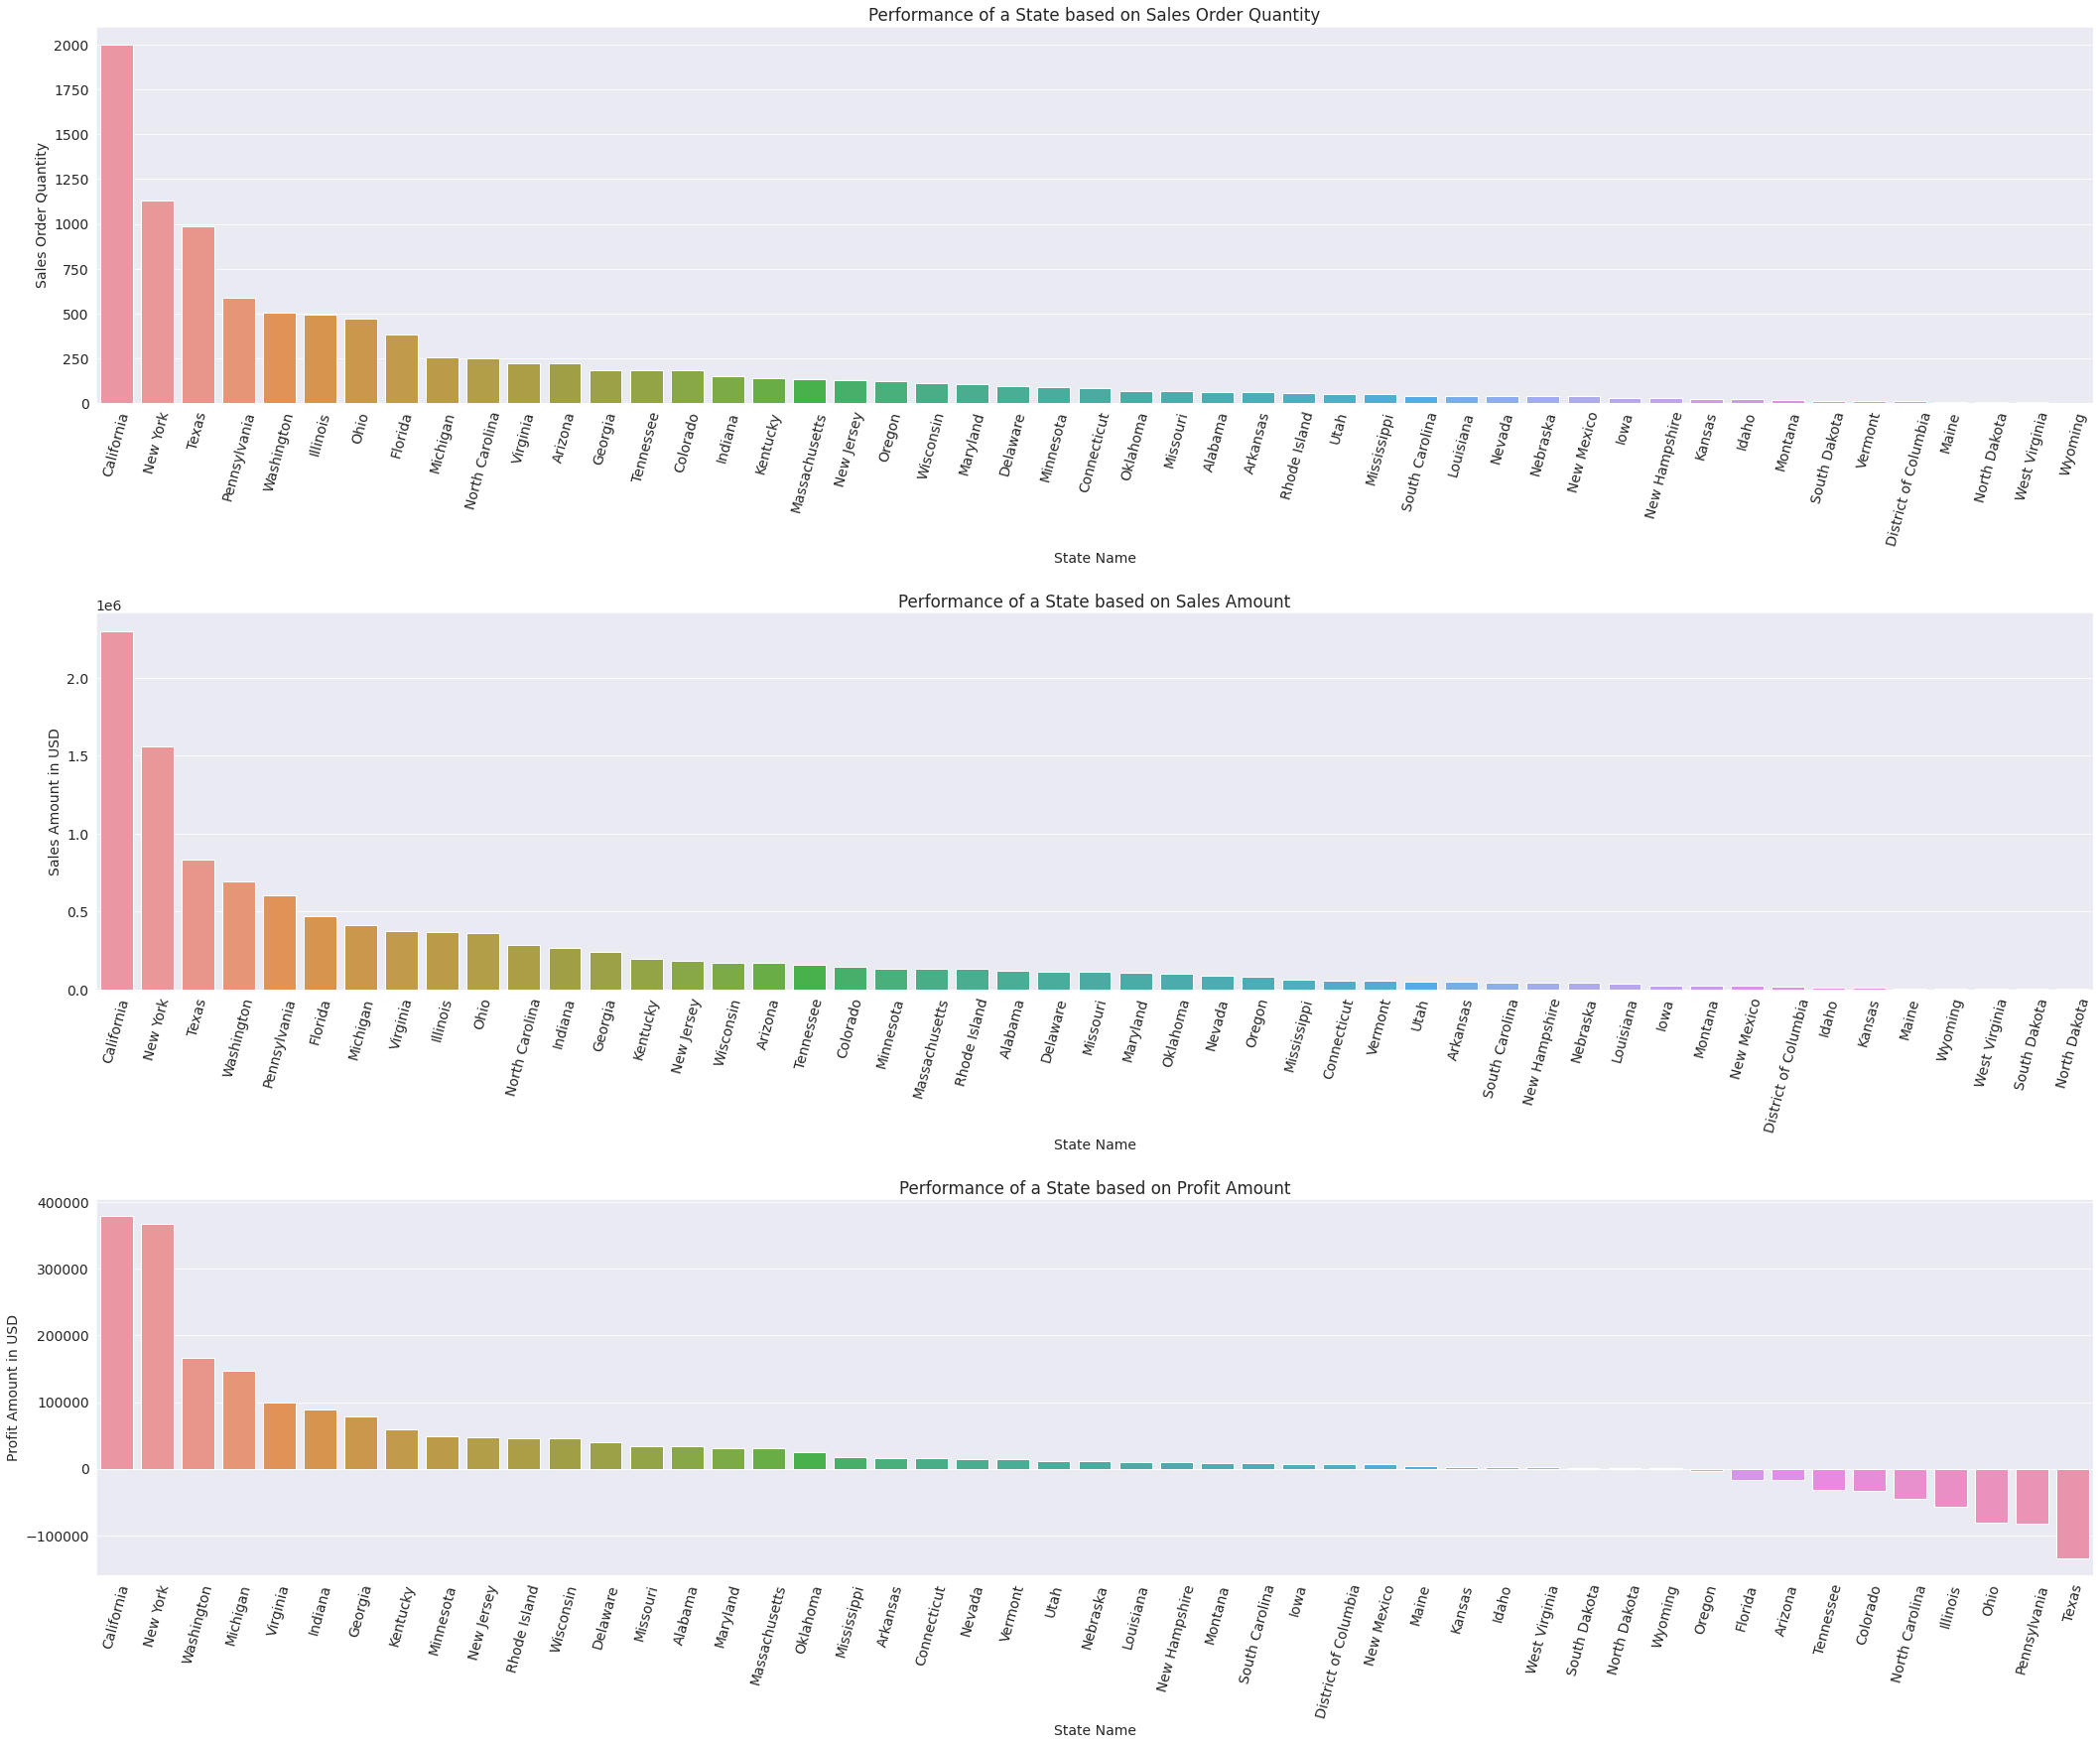

In [36]:
fig, axis = plt.subplots(3,1, figsize=(30, 25))
#axis[0,] for states based on sales order quantity
axis[0,].set_title("Performance of a State based on Sales Order Quantity")
sns.barplot(x = states_qty.index, y = states_qty.quantity, ax = axis[0,])
axis[0,].set_ylabel("Sales Order Quantity")
axis[0,].set_xlabel("State Name")
axis[0,].set_xticklabels(states_qty.index, rotation =75)

#axis[1,] for states based on sales amount
axis[1,].set_title("Performance of a State based on Sales Amount")
sns.barplot(x = states_sales.index, y = states_sales.total_sales, ax = axis[1,])
axis[1,].set_ylabel("Sales Amount in USD")
axis[1,].set_xlabel("State Name")
axis[1,].set_xticklabels(states_sales.index, rotation =75)


#axis[2,] for states based on profit amount 
axis[2,].set_title("Performance of a State based on Profit Amount")
sns.barplot(x = states_profit.index, y = states_profit.total_profit, ax = axis[2,])
axis[2,].set_ylabel("Profit Amount in USD")
axis[2,].set_xlabel("State Name")
axis[2,].set_xticklabels(states_profit.index, rotation =75)


plt.tight_layout(pad=2);


California and New York State occupied the top 2 spots, regardless of whether the measurement is based on number of sales or sales amount or profit amount.

Though New York City topped the ranking among all the cities based on the sales order quantity, sales amount and profit amount, New York State is moved to 2nd position which means that there are some high performing cities in the state of California or low performing cities in the state of New York. 

Also the sales order quantity of New York State is just the half of the California state, the profit amount yielded by the 2 states are almost equal which implies that profit margin is more in the state of New York.

Losses were occurred in approximately 10 states, Texas was the state where huge loss occurred. 

Worst performing states based on the profit amount like Texas, Pennsylvania, Ohio and Illinois were on the list of top 10 states based on the sales order quantity and sales amount. It clearly indicates that profit margin, discount rate plays a crucial role

### Postal Code

Let's check the distribution of sales order quantity, sales and profit among the top performing postal codes in the United States. 

In [37]:
#top_postal_qty means top 10 postal codes based on sales order quantity 
top_postal_qty = retail_store_df.groupby('postal_code').count().sort_values('quantity', ascending = False).head(10)
#top_postal_sales means top 10 postal codes based on sales amount 
top_postal_sales = retail_store_df.groupby('postal_code').sum().sort_values('total_sales', ascending = False).head(10)
#top_postal_profit means top 10 postal codes based on profit amount 
top_postal_profit = retail_store_df.groupby('postal_code').sum().sort_values('total_profit', ascending = False).head(10) 


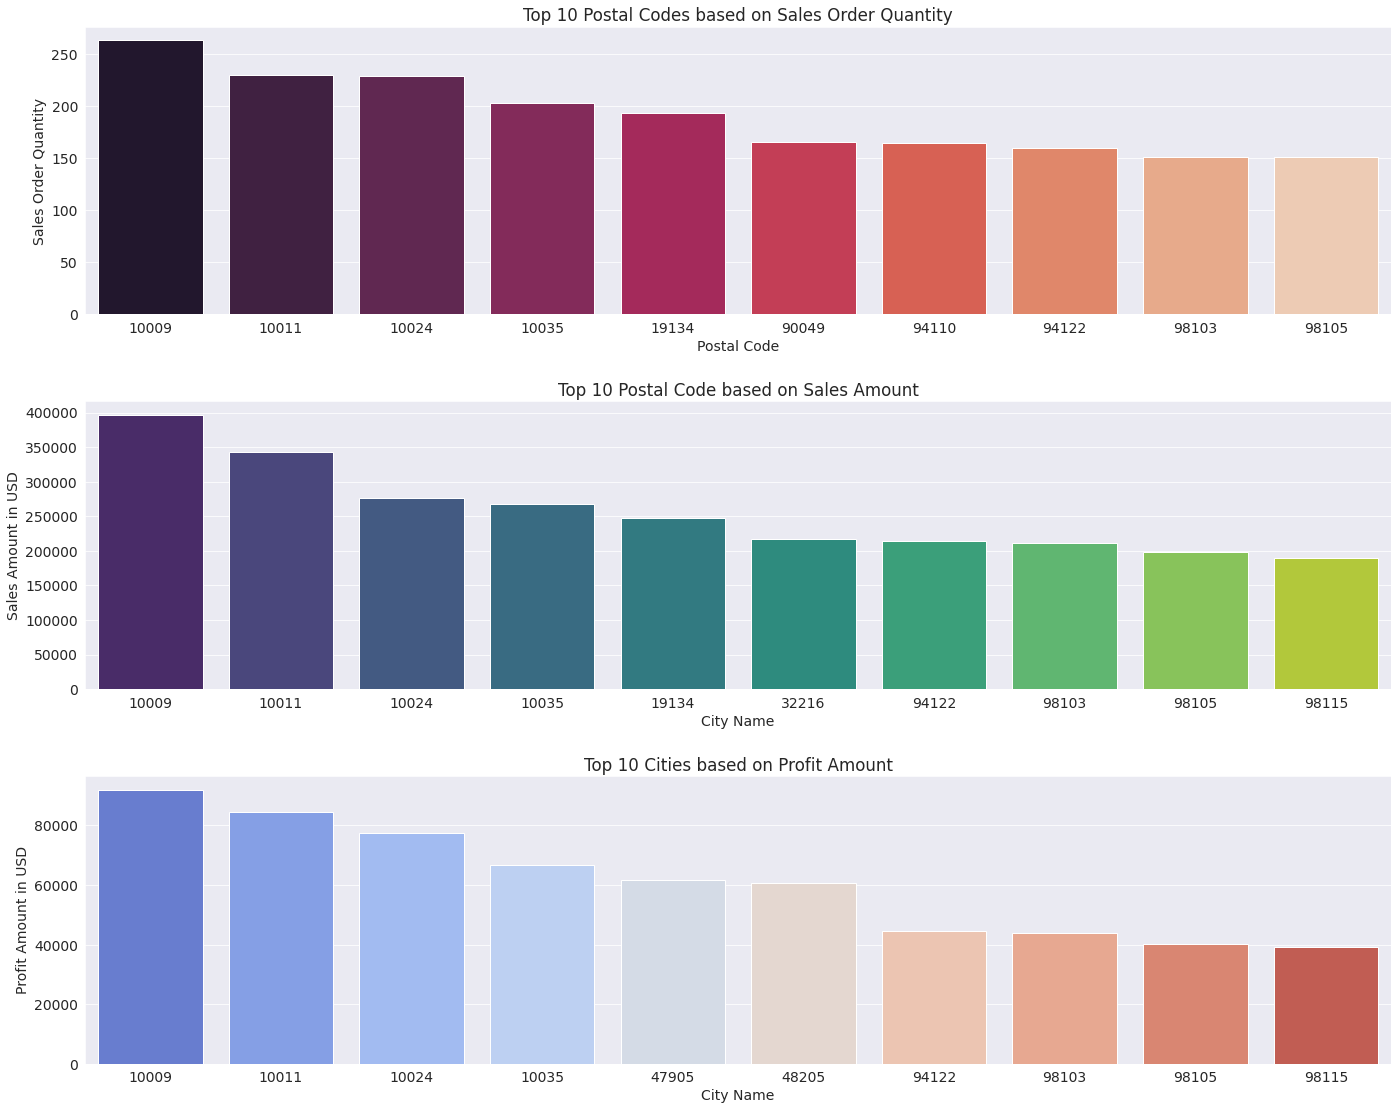

In [38]:
fig, axis = plt.subplots(3,1, figsize=(20, 16))
#axis[0,] for top 10 postal codes based on sales order quantity
axis[0,].set_title("Top 10 Postal Codes based on Sales Order Quantity")
sns.barplot(x = top_postal_qty.index.sort_values(), y = top_postal_qty.quantity, ax = axis[0,], palette ='rocket')
axis[0,].set_ylabel("Sales Order Quantity")
axis[0,].set_xlabel("Postal Code")

#axis[1,] for top 10 postal codes based on sales amount
axis[1,].set_title("Top 10 Postal Code based on Sales Amount")
sns.barplot(x = top_postal_sales.index.sort_values(), y = top_postal_sales.total_sales, ax = axis[1,], palette ='viridis')
axis[1,].set_ylabel("Sales Amount in USD")
axis[1,].set_xlabel("City Name")

#axis[2,] for top 10 postal codes based on profit amount 
axis[2,].set_title("Top 10 Cities based on Profit Amount")
sns.barplot(x = top_postal_profit.index.sort_values() , y = top_postal_profit.total_profit, ax = axis[2,], palette ='coolwarm')
axis[2,].set_ylabel("Profit Amount in USD")
axis[2,].set_xlabel("City Name")


plt.tight_layout(pad=2);


### Region

Let's check the region wise performance of our retail store based on sales and profit amount. 

In [39]:
#region_qty means regions based on sales order quantity 
region_qty = retail_store_df.groupby('region').count().sort_values('quantity', ascending = False)
#region_sales means regions based on sales amount 
region_sales = retail_store_df.groupby('region').sum().sort_values('total_sales', ascending = False)
#region_profit means regions based on profit amount 
region_profit = retail_store_df.groupby('region').sum().sort_values('total_profit', ascending = False)

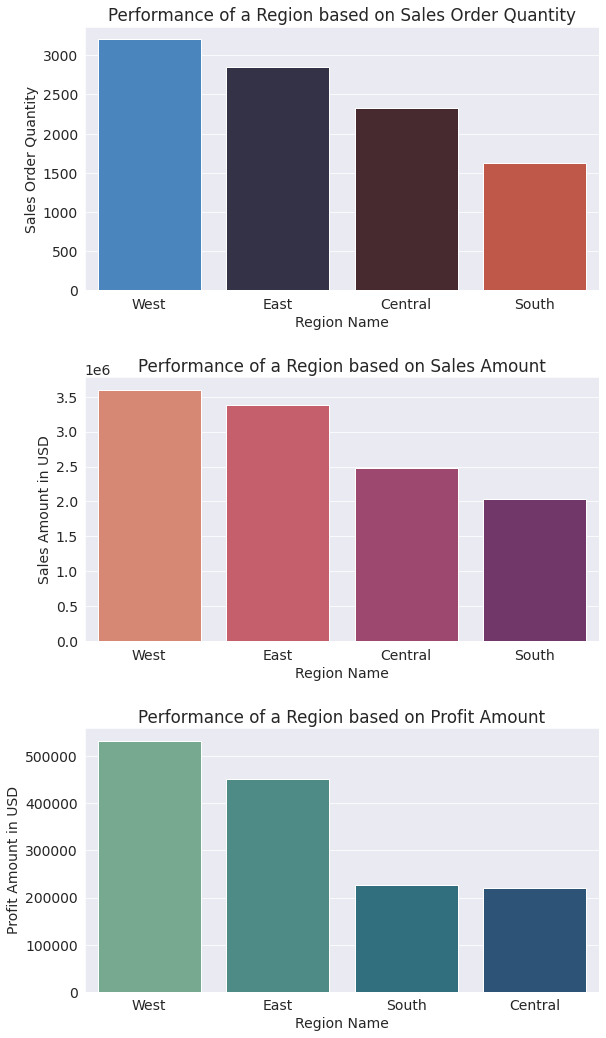

In [40]:
fig, axis = plt.subplots(3,1, figsize=(9,15))
#axis[0,] for regions based on sales order quantity
axis[0,].set_title("Performance of a Region based on Sales Order Quantity")
sns.barplot(x = region_qty.index, y = region_qty.quantity, ax = axis[0,], palette ='icefire')
axis[0,].set_ylabel("Sales Order Quantity")
axis[0,].set_xlabel("Region Name")

#axis[1,] for regions based on sales amount
axis[1,].set_title("Performance of a Region based on Sales Amount")
sns.barplot(x = region_sales.index, y = region_sales.total_sales, ax = axis[1,], palette ='flare')
axis[1,].set_ylabel("Sales Amount in USD")
axis[1,].set_xlabel("Region Name")

#axis[2,] for regions based on profit amount 
axis[2,].set_title("Performance of a Region based on Profit Amount")
sns.barplot(x = region_profit.index, y = region_profit.total_profit, ax = axis[2,], palette ='crest')
axis[2,].set_ylabel("Profit Amount in USD")
axis[2,].set_xlabel("Region Name")

plt.tight_layout(pad=2);


It's obvious that Western and Eastern region always at the top 2 positions respectively, whereas Central region moved to last position based on the profit amount (only with a slight difference). 

### Category

Let's check the distribution of sales order quantity, sales and profit among the different categories. 

In [41]:
#category_qty means categories based on sales order quantity 
category_qty = retail_store_df.groupby('category').count().sort_values('quantity', ascending = False)
#category_sales means categories based on sales amount 
category_sales = retail_store_df.groupby('category').sum().sort_values('total_sales', ascending = False)
#category_profit means categories based on profit amount 
category_profit = retail_store_df.groupby('category').sum().sort_values('total_profit', ascending = False)

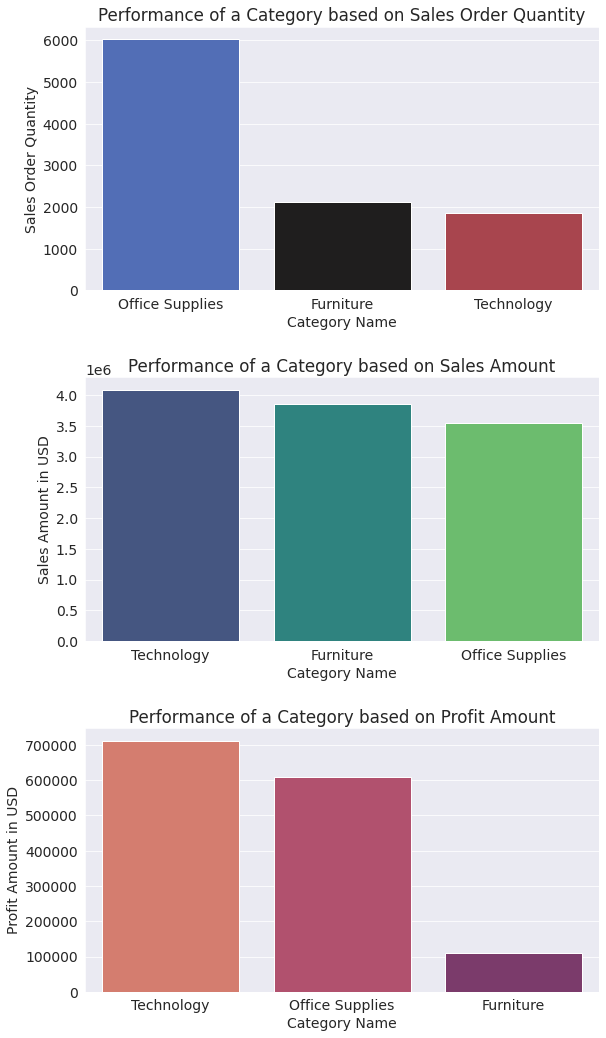

In [42]:
fig, axis = plt.subplots(3,1, figsize=(9,15))
#axis[0,] for categories based on sales order quantity
axis[0,].set_title("Performance of a Category based on Sales Order Quantity")
sns.barplot(x = category_qty.index, y = category_qty.quantity, ax = axis[0,], palette = 'icefire')
axis[0,].set_ylabel("Sales Order Quantity")
axis[0,].set_xlabel("Category Name")

#axis[1,] for categories based on sales amount
axis[1,].set_title("Performance of a Category based on Sales Amount")
sns.barplot(x = category_sales.index, y = category_sales.total_sales, ax = axis[1,], palette ='viridis')
axis[1,].set_ylabel("Sales Amount in USD")
axis[1,].set_xlabel("Category Name")

#axis[2,] for categories based on profit amount 
axis[2,].set_title("Performance of a Category based on Profit Amount")
sns.barplot(x = category_profit.index, y = category_profit.total_profit, ax = axis[2,], palette ='flare')
axis[2,].set_ylabel("Profit Amount in USD")
axis[2,].set_xlabel("Category Name")

plt.tight_layout(pad=2);


We have more profit when delivering Technology products, whereas we have too little profit in Furniture products, based on the above output.

Even though Technology category has very few sales orders, the proportion of sales amount and profit increase is much higher than other categories because of the high selling price and large profit margin in Technology products. 

### Sub-Category

Let's check the distribution of sales order quantity, sales and profit among the different sub-categories. 

In [43]:
#sub_category_qty means sub-categories based on sales order quantity 
sub_category_qty = retail_store_df.groupby('sub_category').count().sort_values('quantity', ascending = False)
#sub_category_sales means sub-categories based on sales amount 
sub_category_sales = retail_store_df.groupby('sub_category').sum().sort_values('total_sales', ascending = False)
#sub_category_profit means sub-categories based on profit amount 
sub_category_profit = retail_store_df.groupby('sub_category').sum().sort_values('total_profit', ascending = False)

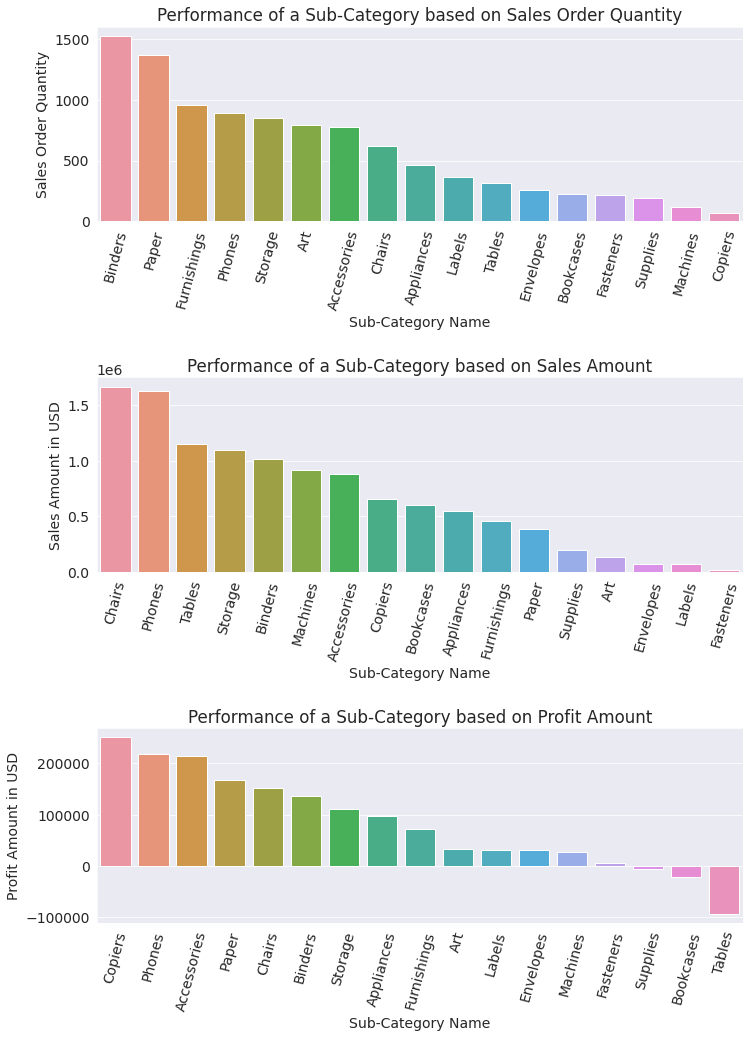

In [44]:
fig, axis = plt.subplots(3,1, figsize=(11,15))
#axis[0,] for sub-categories based on sales order quantity
axis[0,].set_title("Performance of a Sub-Category based on Sales Order Quantity")
sns.barplot(x = sub_category_qty.index, y = sub_category_qty.quantity, ax = axis[0,])
axis[0,].set_ylabel("Sales Order Quantity")
axis[0,].set_xlabel("Sub-Category Name")
axis[0,].set_xticklabels(sub_category_qty.index, rotation =75)


#axis[1,] for sub-categories based on sales amount
axis[1,].set_title("Performance of a Sub-Category based on Sales Amount")
sns.barplot(x = sub_category_sales.index, y = sub_category_sales.total_sales, ax = axis[1,])
axis[1,].set_ylabel("Sales Amount in USD")
axis[1,].set_xlabel("Sub-Category Name")
axis[1,].set_xticklabels(sub_category_sales.index, rotation =75)

#axis[2,] for sub-categories based on profit amount 
axis[2,].set_title("Performance of a Sub-Category based on Profit Amount")
sns.barplot(x = sub_category_profit.index, y = sub_category_profit.total_profit, ax = axis[2,])
axis[2,].set_ylabel("Profit Amount in USD")
axis[2,].set_xlabel("Sub-Category Name")
axis[2,].set_xticklabels(sub_category_profit.index, rotation =75)

plt.tight_layout(pad=2);


The above output provides in-depth details regarding the sub-categories of each major category, since we have already analyzed which category has a higher sales order quantity, sales and profit amount.

Clearly, furniture products like tables and bookcases incurred a heavy loss whereas technology products like phones and copiers made huge profits. 

### Pair wise relationship 

A pair plot gives pairwise relationships in a dataset. Let’s say that we have 5 variables in a dataset. When we implement pair plot with this data, it will create plots between those 5 variables. Say for example, the first variable will be taken as the x-axis value and other variables will be taken as y-axis value individually. As a result, you will have 5 plots for 1st variable alone. This will be repeated for the other variables as well.

The idea behind pair plot is to understand the relationship between the variables present in the data.

Let's separate numeric columns from the dataset to apply `pairplot()` function to understand the relationship between the different attributes. 

In [45]:
#separate columns with numeric values
numeric_column = retail_store_df[['total_sales','total_profit','discount', 'quantity']] 

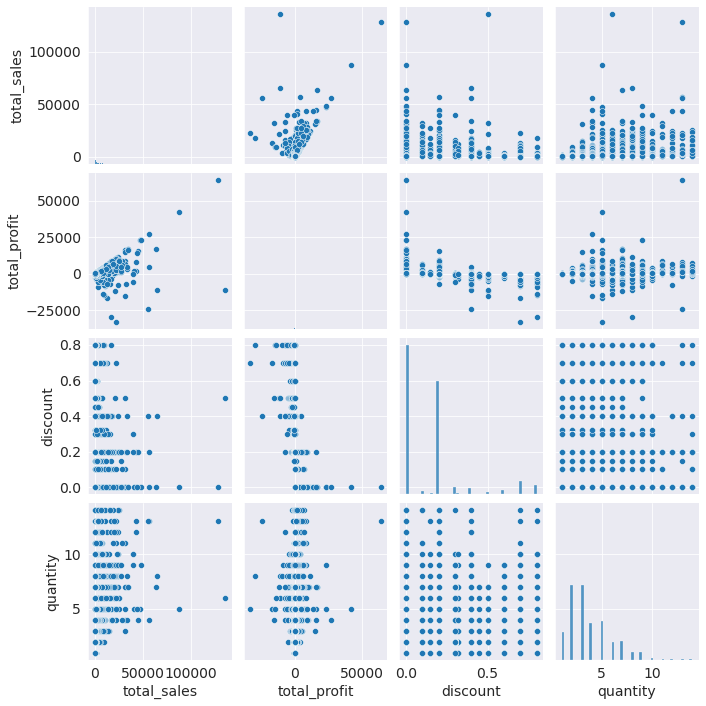

In [46]:
sns.pairplot(numeric_column);

By using `pairplot()` function, we can easily understand and visualize the relationship between the different variables.

Based on the above output, we can see that in some cases, even if the sales amount is huge, massive losses have been incurred. 

Our biggest loss came from offering maximum discounts of 80%, whereas our maximum profit came from not offering discounts. 

### Correlation Matrix

Correlation matrix can help us understand the relationship between different variables in a dataset. The `corr()` function is used to create a correlation matrix from a dataset. And the correlation between variables will be visualized using a Heat Map with the help of `sns.heatmap()` function. 

A correlation value ranging from +1 to -1. Correlation value of `+1` indicates that if one variable increases by 1 unit, then the other variable increases by 1 unit as well. This is called a `Positive Correlation`. 

When the correlation between two variables is `-1`, the value of one variable decreases by 1 unit when the other increases by 1 unit and vice versa. This is referred to as `Negative Correlation`.

In [47]:
correlation_matrix = numeric_column.corr()

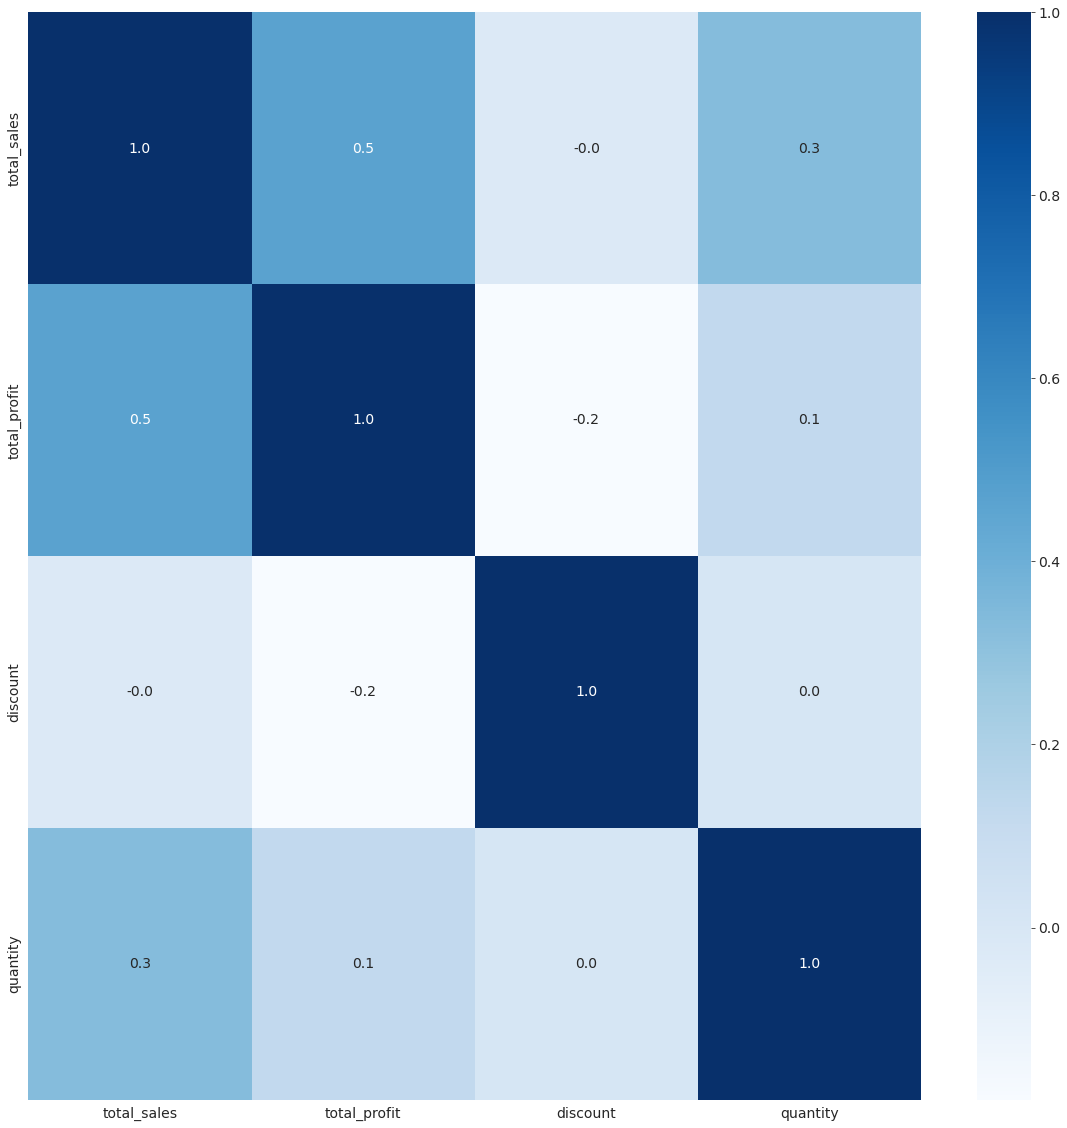

In [48]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, cbar = True, fmt='.1f', annot=True, cmap='Blues');

It's obvious that there is a strong correlation between total profit and total sales amount (i.e. 0.5), which means if sales amount increases by 1 unit, profit will increase by 0.5 unit, and vice versa. This is known as Positive Correlation. 

Similarly, the amount of sales increases by 0.3 unit when the product quantity increases by 1 unit. And the product quantity has no effect on the discount value.

A negative correlation exists between discount and total profit. When discount increases by 1 unit, total profit amounts decrease by 0.2 unit.

---

# Exploration

We've already gained several insights about our retail store business and their performance by exploring individual columns of the dataset. Let's ask some specific questions and we'll try to answer them using data frame operations and visualization. 

#### Q: How many states are there in the United States and have we covered them all? Please mention if there are any states left.

Let's download the kaggle dataset which contains the list of States and Cities in the United States. 

In [49]:
#assign the dataset raw url to a variable 
us_cities_url = "https://raw.githubusercontent.com/lafirm/datasets/main/us_cities.csv"

In [50]:
#download the dataset and name it as us_cities_dataset.csv 
urlretrieve(us_cities_url, 'us_cities_dataset.csv')

('us_cities_dataset.csv', <http.client.HTTPMessage at 0x7fcc6befba90>)

In [51]:
#check whether it's downloaded
os.listdir()

['.bash_logout',
 '.profile',
 '.bashrc',
 '.ipynb_checkpoints',
 '.ipython',
 '.local',
 'retail-store-analysis.ipynb',
 '.cache',
 '.jovianrc',
 'retail_store_dataset.csv',
 'us_cities_dataset.csv',
 '.jupyter',
 '.jovian',
 '.config',
 '.conda',
 '.wget-hsts',
 '.git',
 'work',
 '.npm']

In [52]:
#let's convert the CSV file into pandas data frame 
us_cities_df = pd.read_csv('us_cities_dataset.csv')
us_cities_df.rename(columns = {'state_name' : 'state'}, inplace =True )

In [53]:
#retrieve list of states from the us_cities_df 
us_cities_df['state'].unique()

array(['New York', 'California', 'Illinois', 'Florida', 'Texas',
       'Pennsylvania', 'Georgia', 'District of Columbia', 'Massachusetts',
       'Arizona', 'Washington', 'Michigan', 'Minnesota', 'Colorado',
       'Maryland', 'Nevada', 'Oregon', 'Missouri', 'Ohio', 'Indiana',
       'North Carolina', 'Virginia', 'Wisconsin', 'Rhode Island', 'Utah',
       'Tennessee', 'Louisiana', 'Kentucky', 'Oklahoma', 'Connecticut',
       'Nebraska', 'Hawaii', 'New Mexico', 'Alabama', 'South Carolina',
       'Kansas', 'Iowa', 'Arkansas', 'Idaho', 'Mississippi',
       'Puerto Rico', 'New Jersey', 'Alaska', 'New Hampshire',
       'North Dakota', 'Maine', 'South Dakota', 'West Virginia',
       'Montana', 'Delaware', 'Vermont', 'Wyoming'], dtype=object)

Although there are only 50 states in the United States, our dataset contains 52 distinct items in state_name column, since Puerto Rico and District of Columbia were added. Already, there's been some debate about whether there are 50 states in the United States or not.

On the other hand, District of Columbia is a Federal District and Puerto Rico is a U.S. Territory. 

However, we will compare the list of states where we do business with the list of states (i.e. 52) provided in the US Cities dataset. 

In [54]:
#states_retail_store is the retail_store_df data frame grouped by states with count function 
states_retail_store = retail_store_df.groupby('state').count().reset_index('state')
#states_us_cities is the us_cities_df data frame grouped by states with count function 
states_us_cities = us_cities_df.groupby('state').count().reset_index('state')

In [55]:
#merge the states_retail_store and states_us_cities data frame 
states_merged = states_retail_store.merge(states_us_cities, how ='right', on = 'state')
#use isna().any(axis=1) to find any rows with null value 
states_merged[states_merged.isna().any(axis = 1)]

,state,shipment_mode,customer_type,country,city_x,postal_code,region,category,sub_category,sales,...,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
1,Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,326,326,326,326,326,326,326,326,325,326
11,Hawaii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,149,149,149,149,149,149,149,149,149,149
39,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,243,243,243,243,243,243,243,243,243,243


According to our assumption, we covered 49 of the 52 states in the United States, but Alaska, Hawaii, and Puerto Rico were not covered.

**In reality, we have covered 48 states of the USA along with the District of Columbia. We have not covered two states, Alaska and Hawaii.**

This may be due to a fear of more expensive postage or a longer delivery time when compared to other states. 

#### Q: What is the most popular and least popular mode of shipment preferred by customers? Why? 

In [56]:
#shipment_modes_df is a retail_store_df data frame grouped by shipment_mode with count function 
shipment_modes_df = retail_store_df.groupby('shipment_mode').count()
shipment_modes_df

,customer_type,country,city,state,postal_code,region,category,sub_category,sales,quantity,discount,profit,total_sales,total_profit
shipment_mode,,,,,,,,,,,,,,
First Class,1538,1538,1538,1538,1538,1538,1538,1538,1538,1538,1538,1538,1538,1538
Same Day,543,543,543,543,543,543,543,543,543,543,543,543,543,543
Second Class,1945,1945,1945,1945,1945,1945,1945,1945,1945,1945,1945,1945,1945,1945
Standard Class,5968,5968,5968,5968,5968,5968,5968,5968,5968,5968,5968,5968,5968,5968


In [57]:
#find the most popular mode of shipment 
i = 0
maximum = max(shipment_modes_df.customer_type)
while i < shipment_modes_df.shape[0] :
    if shipment_modes_df.customer_type[i] == maximum :
        print("The most popular shipment mode is {} and was chosen by {} customers.".format(shipment_modes_df.index[i], shipment_modes_df.customer_type[i]))
    i += 1

The most popular shipment mode is Standard Class and was chosen by 5968 customers.


In [58]:
#find the least popular mode of shipment 
i = 0
minimum = min(shipment_modes_df.customer_type)
while i < shipment_modes_df.shape[0] :
    if shipment_modes_df.customer_type[i] == minimum :
        print("The least popular shipment mode is {} and was chosen by {} customers".format(shipment_modes_df.index[i], shipment_modes_df.customer_type[i]))
    i += 1

The least popular shipment mode is Same Day and was chosen by 543 customers


#### Q: We deal with what kinds of customers? Which types of customers yield us great profits and big losses? 

In [59]:
#customer_list_df is a retail_store_df data frame grouped by customer_type with sum function 
customer_list_df = retail_store_df.groupby('customer_type').sum()
customer_list_df

,sales,quantity,discount,profit,total_sales,total_profit
customer_type,,,,,,
Consumer,1.161401e+06,19521,820.91,134119.2092,5.819347e+06,668625.1144
Corporate,7.061464e+05,11608,477.85,91979.1340,3.516108e+06,469455.7386
Home Office,4.296531e+05,6744,262.33,60298.6785,2.152607e+06,292347.7247


In [60]:
#print the types of customer list
print ('The types of customers we dealt with were:')
for i in customer_list_df.index:
    print (i)

The types of customers we dealt with were:
Consumer
Corporate
Home Office


In [61]:
#find the customer type with more profit 
i = 0
maximum = max(customer_list_df.profit)
while i < customer_list_df.shape[0] :
    if customer_list_df.profit[i] == maximum :
        print("The type of customer who yields us the most profit cumulatively is '{}', and the cumulative maximum profit is {:.2f} USD.".format(customer_list_df.index[i], customer_list_df.profit[i])) 
    i += 1

The type of customer who yields us the most profit cumulatively is 'Consumer', and the cumulative maximum profit is 134119.21 USD.


In [62]:
#find the customer type with less profit 
i = 0
minimum = min(customer_list_df.profit)
while i < customer_list_df.shape[0] :
    if customer_list_df.profit[i] == minimum :
        print("The type of customer who yields us the least profit cumulatively is '{}' and the amount was {:.2f} USD.".format(customer_list_df.index[i], customer_list_df.profit[i]))
    i += 1

The type of customer who yields us the least profit cumulatively is 'Home Office' and the amount was 60298.68 USD.


#### Q: What is the percentage and number of sales orders that ended in a loss?  

In [63]:
#loss_sales is a part of retail_store_df with only sales orders where losses occurred 
loss_sales = retail_store_df[retail_store_df.total_profit < 0]
#profit_sales is a part of retail_store_df with only profited sales orders 
profit_sales = retail_store_df[retail_store_df.total_profit > 0]

In [64]:
#loss_pct is the % of sales orders where losses occurred wrt total sales orders 
loss_pct = loss_sales.shape[0] / retail_store_df.shape[0] *100
loss_pct

18.721232739643785

In [65]:
print("The number of sales orders that ended in loss is '{}', which is {:.2f}% of total sales orders.".format(loss_sales.shape[0], loss_pct))

The number of sales orders that ended in loss is '1871', which is 18.72% of total sales orders.


#### Q: What are the top 50 sales orders with massive losses? What are the reasons for it? 

In [66]:
#loss_50 is a list of top 50 sales orders with huge losses 
loss_50 = loss_sales.sort_values('total_profit').head(50)
loss_50

,shipment_mode,customer_type,country,city,state,postal_code,region,category,sub_category,sales,quantity,discount,profit,total_sales,total_profit
7772,Standard Class,Consumer,United States,Lancaster,Ohio,43130,East,Technology,Machines,4499.9850,5,0.70,-6599.9780,22499.9250,-32999.8900
9774,Standard Class,Consumer,United States,San Antonio,Texas,78207,Central,Office Supplies,Binders,2177.5840,8,0.80,-3701.8928,17420.6720,-29615.1424
9639,Second Class,Consumer,United States,Concord,North Carolina,28027,South,Furniture,Tables,4297.6440,13,0.40,-1862.3124,55869.3720,-24210.0612
3011,Standard Class,Home Office,United States,Louisville,Colorado,80027,West,Technology,Machines,2549.9850,5,0.70,-3399.9800,12749.9250,-16999.9000
683,Same Day,Corporate,United States,Burlington,North Carolina,27217,South,Technology,Machines,7999.9800,4,0.50,-3839.9904,31999.9200,-15359.9616
4991,Standard Class,Corporate,United States,Chicago,Illinois,60653,Central,Office Supplies,Binders,1889.9900,5,0.80,-2929.4845,9449.9500,-14647.4225
5310,First Class,Consumer,United States,Houston,Texas,77095,Central,Office Supplies,Binders,1525.1880,6,0.80,-2287.7820,9151.1280,-13726.6920
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522,21584.0100,-11655.3654
165,Standard Class,Consumer,United States,San Antonio,Texas,78207,Central,Technology,Machines,8159.9520,8,0.40,-1359.9920,65279.6160,-10879.9360
2697,Standard Class,Home Office,United States,Jacksonville,Florida,32216,South,Technology,Machines,22638.4800,6,0.50,-1811.0784,135830.8800,-10866.4704


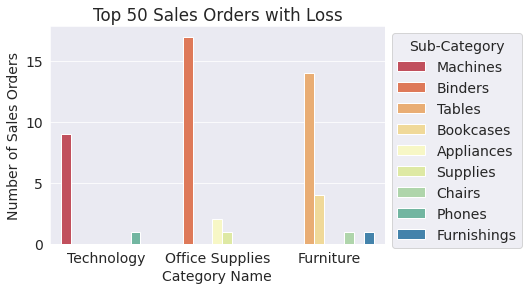

In [67]:
#plot top 50 sales orders wrt categories and sub-categories 
plt.figure(figsize=(6, 4))
plt.title("Top 50 Sales Orders with Loss")
sns.countplot(x = 'category', data = loss_50, hue ='sub_category', palette = 'Spectral')
plt.legend(title ='Sub-Category', bbox_to_anchor = (1,1), loc=2)
plt.xlabel("Category Name")
plt.ylabel("Number of Sales Orders");

Technology products are the most profitable compared to other major categories, however the sales order that had a major loss of approximately 33K USD was a Machine which fell under the Technology category, and 6 out of 20 sales orders with enormous losses were Machines under the Technology category.

It shows us that it is the machines that reduce the overall performance and profit of technology-based products. 

Similarly, Binders under the office supplies category and Tables under the furniture category had the poorest performance. 

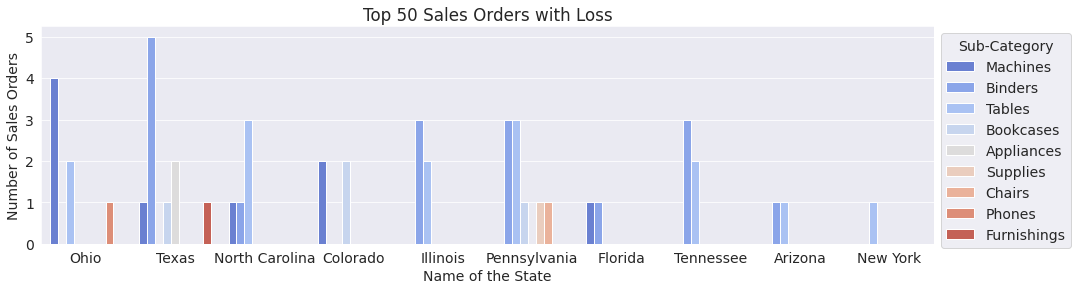

In [68]:
#plot top 50 sales orders wrt the state and sub-categories 
plt.figure(figsize=(16, 4))
plt.title("Top 50 Sales Orders with Loss")
sns.countplot(x = 'state', data = loss_50, hue ='sub_category', palette = 'coolwarm')
plt.legend(title ='Sub-Category', bbox_to_anchor = (1,1), loc=2)
plt.xlabel("Name of the State")
plt.ylabel("Number of Sales Orders");

In [69]:
#average discount value of top 50 sales orders with huge loss 
loss_50.discount.mean()

0.5903999999999998

The combined sales of 17 binders and 9 machines represents half of the 50 top sales with huge losses. This shows that regardless of the state in which the item was sold, we are losing money.

This could be due to a warranty claim, a high discount, or a low profit margin. And the average discount value for the top 50 sales orders with loss was 60%. 

#### Q: Which category of products yields us more profit and more loss? 

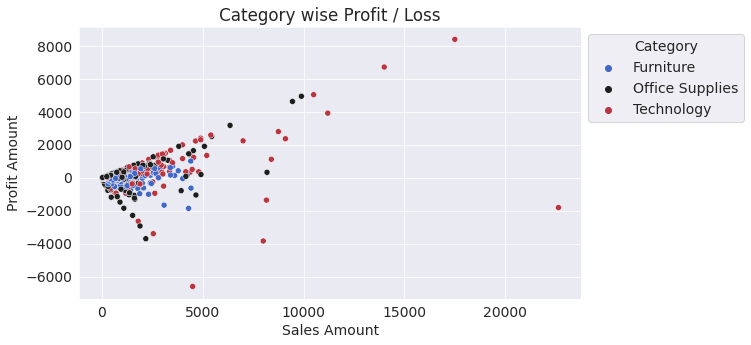

In [70]:
#plot sales vs profit amount wrt categories using retail_store_df data frame 
plt.title("Category wise Profit / Loss")
sns.scatterplot(x = 'sales', y = 'profit', data = retail_store_df, hue ='category', palette='icefire')
plt.xlabel('Sales Amount')
plt.ylabel('Profit Amount')
plt.legend(title ='Category', bbox_to_anchor =(1,1), loc=2);

With the above output, it's evident that Furniture category products yield us more losses as sales increase. 

The Technology and Office Supplies category products yield a good amount of profit for us, despite some sales orders having a loss. 

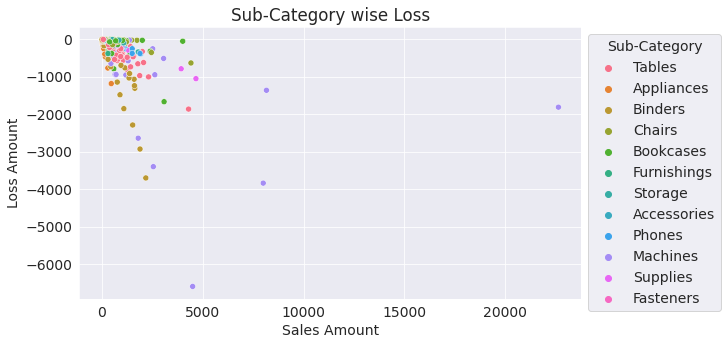

In [71]:
#plot sales vs profit amount wrt sub-categories wise using loss_sales data frame 
plt.title("Sub-Category wise Loss")
sns.scatterplot(x = 'sales', y = 'profit', data = loss_sales, hue ='sub_category')
plt.xlabel('Sales Amount')
plt.ylabel('Loss Amount')
plt.legend(title ='Sub-Category', bbox_to_anchor = (1,1), loc=2);

Some of the products which yielded us more loss were Machines, Binders, Tables and Bookcases. 

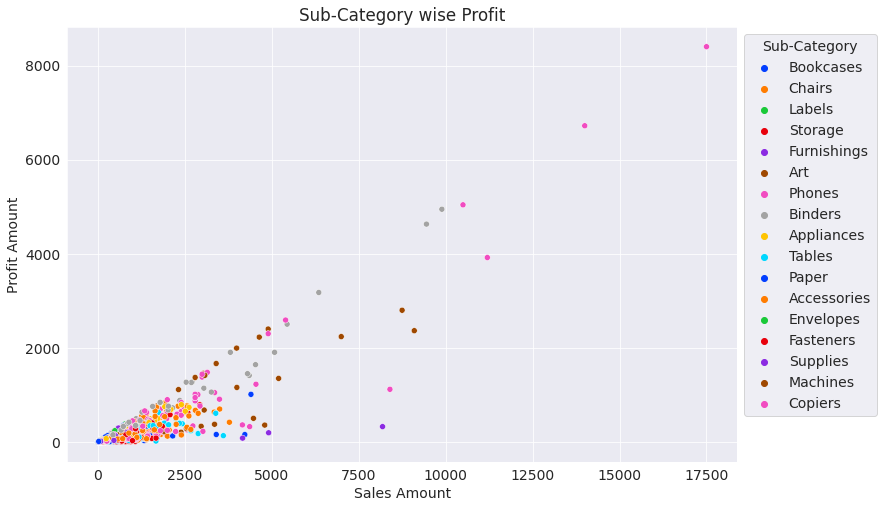

In [72]:
#plot sales vs profit amount wrt sub-categories using profit_sales data frame 
plt.figure(figsize =(12, 8))
plt.title("Sub-Category wise Profit")
sns.scatterplot(x = 'sales', y = 'profit', data = profit_sales, hue ='sub_category', palette ='bright')
plt.xlabel('Sales Amount')
plt.ylabel('Profit Amount')
plt.legend(title ='Sub-Category', bbox_to_anchor = (1,1), loc=2);

Copiers, binders, and machines were some of the products that yielded us the most profit. However, Binders, and Machines individually, yielded us the most loss.

Let's examine each category separately to understand in detail.

In [73]:
#binders_df is retail_store_df with only binders in the sub-category column 
binders_df = retail_store_df[(retail_store_df.sub_category == 'Binders')]
#machines_df is the retail_store_df with only machines in the sub-category column 
machines_df = retail_store_df[(retail_store_df.sub_category == 'Machines')]

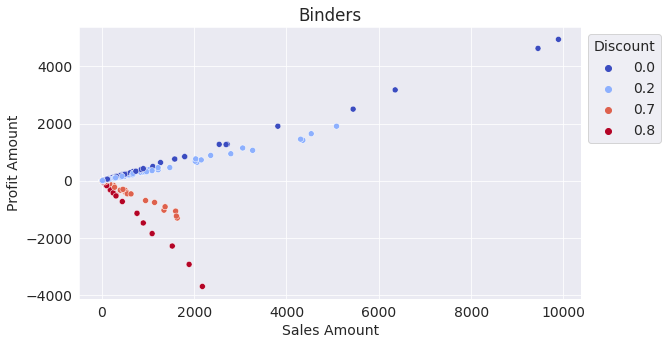

In [74]:
#plot sales vs profit amount wrt discount values using binders_df data frame 
plt.title("Binders")
sns.scatterplot(x = 'sales', y = 'profit', data = binders_df, hue ='discount', palette = 'coolwarm')
plt.xlabel('Sales Amount')
plt.ylabel('Profit Amount')
plt.legend(title ='Discount', bbox_to_anchor =(1,1), loc=2);

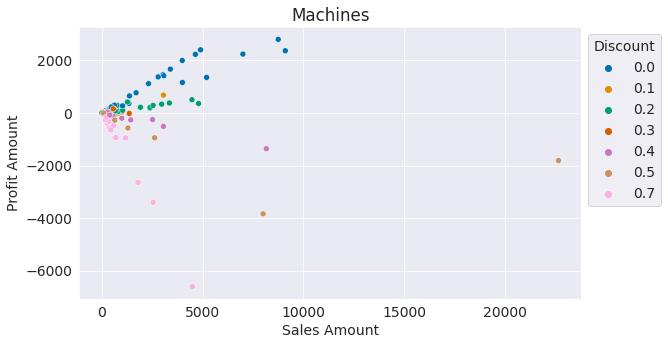

In [75]:
#plot sales vs profit amount wrt discount values using machines_df data frame 
plt.title("Machines")
sns.scatterplot(x = 'sales', y = 'profit', data = machines_df, hue ='discount', palette ='colorblind')
plt.xlabel('Sales Amount')
plt.ylabel('Profit Amount')
plt.legend(title = 'Discount', bbox_to_anchor =(1,1), loc=2);

Based on the above results, it is clear that the products like machines and binders yield us more profit with no discount and a great loss with a high discount amount. 

We should therefore avoid giving discounts on binders and machines in order to avoid huge losses. 

#### Q: What is the impact of discount value on the profit of a sales order? 

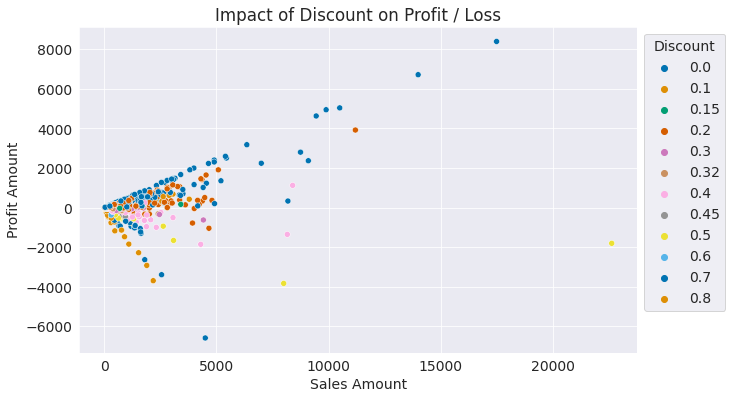

In [76]:
#plot sales vs profit amount wrt discount values for the entire sales orders using retail_store_df 
plt.figure(figsize=(10, 6))
plt.title("Impact of Discount on Profit / Loss")
sns.scatterplot(x = 'sales', y = 'profit', data = retail_store_df, hue ='discount', palette ='colorblind')
plt.xlabel('Sales Amount')
plt.ylabel('Profit Amount')
plt.legend(title ='Discount', bbox_to_anchor =(1,1), loc=2);

As we can clearly see, the Discount Value does have some impact on Profit / Loss of a sales order, and that impact is negative.

In addition, we know there is a negative correlation between Profit Amount and Discount Value, which equals -0.2. 

While we achieved maximum profit with no discount, we suffered a huge loss with the highest discount value. 

#### Q: Which cities have fewer sales orders? What can you do to increase them? 

In [77]:
#cities_df is retail_store_df grouped by cities with count function
cities_df = retail_store_df.groupby(['city']).count()
#cities_5soq means cities_df with cities less than 5 sales order quantity 
cities_5soq = cities_df[cities_df.quantity < 5].reset_index()
cities_5soq

,city,shipment_mode,customer_type,country,state,postal_code,region,category,sub_category,sales,quantity,discount,profit,total_sales,total_profit
0,Aberdeen,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,Abilene,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,Allen,4,4,4,4,4,4,4,4,4,4,4,4,4,4
3,Altoona,2,2,2,2,2,2,2,2,2,2,2,2,2,2
4,Andover,4,4,4,4,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,Woodbury,3,3,3,3,3,3,3,3,3,3,3,3,3,3
225,Woodland,3,3,3,3,3,3,3,3,3,3,3,3,3,3
226,Woonsocket,4,4,4,4,4,4,4,4,4,4,4,4,4,4
227,Yucaipa,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [78]:
print("There are {} cities with less than {} sales orders".format(cities_5soq.shape[0], max(cities_5soq.quantity)+1 ))

There are 229 cities with less than 5 sales orders


This means we have less than five sales orders in 229 cities of the total 531 cities we have covered. This works out to 43% of the total number of cities we cover. 

This could be due to the limited reach of our products or poor customer experience. We can increase sales by improving the customer experience and by implementing sales and marketing techniques. 

#### Q: How can you increase your business's profits and avoid losses? 

We already know that most of our losses come from high discount values. Before implementing any changes, let's review our overall profit. 

In [79]:
#sum of all the individual sales orders profits before improvement 
sum_of_profits_before = profit_sales.total_profit.sum() / 1e6
print ("Sum of all the profits made by our business is {:.2f} Million USD.".format(sum_of_profits_before))

Sum of all the profits made by our business is 2.21 Million USD.


In [80]:
#sum of all the individual sales orders profits and losses before improvement 
overall_profit_before = retail_store_df.total_profit.sum() / 1e6
print ("The overall profit made by our business is {:.2f} Million USD and it's {:.1f}% of Sum of the Profits we made.".format(overall_profit_before,(overall_profit_before/sum_of_profits_before*100)))

The overall profit made by our business is 1.43 Million USD and it's 64.6% of Sum of the Profits we made.


In [81]:
#sum of all the individual sales orders losses before improvement 
sum_of_losses_before = loss_sales.total_profit.sum() / 1e6
print ("Sum of all the losses made by our business is {:.2f} Million USD and it's {:.1f}% of Sum of the Profits we made.".format(-sum_of_losses_before, -sum_of_losses_before/sum_of_profits_before*100))

Sum of all the losses made by our business is 0.78 Million USD and it's 35.4% of Sum of the Profits we made.


Let's remove the sales orders with discount value more than 50%. 

In [82]:
#no_50_discount is a retail_store_df with sales orders list with discount only less than 50%
no_50_discount = retail_store_df[retail_store_df.discount < 0.5]
#no_50_profit is a profit_sales df with sales order discount only less than 50%
no_50_profit = profit_sales[profit_sales.discount < 0.5]
#no_50_loss is a loss_sales df with sales order discount only less than 50%
no_50_loss = loss_sales[loss_sales.discount < 0.5] 

In [83]:
#sum of all the individual sales orders profits after improvement 
sum_of_profits_after = no_50_profit.total_profit.sum() / 1e6
print ("Sum of all the profits made with discount not more than 50% is {:.2f} Million USD.".format(sum_of_profits_after))

Sum of all the profits made with discount not more than 50% is 2.21 Million USD.


In [84]:
#sum of all the individual sales orders profits and losses after improvement 
overall_profit_after = no_50_discount.total_profit.sum() / 1e6
print ("The overall profit made with no discount value more than 50% is {:.2f} Million USD.".format(overall_profit_after)) 

The overall profit made with no discount value more than 50% is 1.91 Million USD.


In [85]:
#sum of all the individual sales orders losses after improvement 
sum_of_losses_after = no_50_loss.total_profit.sum() / 1e6
print ("Sum of all the losses made with discount value not more than 50% is {:.2f} Million USD. ".format(-sum_of_losses_after))

Sum of all the losses made with discount value not more than 50% is 0.30 Million USD. 


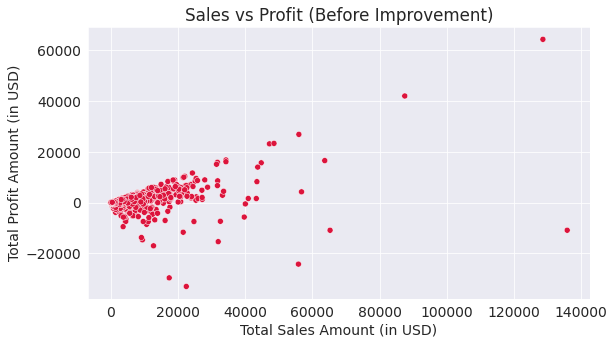

In [86]:
#plot sales vs profit amount of retail_store_df before improvement 
plt.title('Sales vs Profit (Before Improvement)')
sns.scatterplot(x='total_sales', y ='total_profit', data = retail_store_df, hue ='country', palette =['crimson'])
plt.xlabel('Total Sales Amount (in USD)')
plt.ylabel('Total Profit Amount (in USD)')
plt.legend().remove();

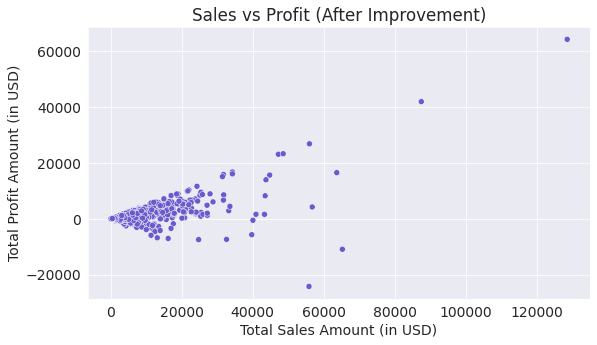

In [87]:
#plot sales vs profit amount of retail_store_df after improvement 
plt.title('Sales vs Profit (After Improvement)')
sns.scatterplot(x='total_sales', y ='total_profit', data = no_50_discount, hue='country', palette = ['slateblue'])
plt.xlabel('Total Sales Amount (in USD)')
plt.ylabel('Total Profit Amount (in USD)')
plt.legend().remove();

The data provided led us to recommend that the discount given on products be reduced in order to reduce losses and increase profits. If there is any additional data such as profit margin or cost price, our recommendation might differ. 


We improved our business by removing the list of sales orders with more than 50% discount, which removed 922 sales orders from our retail_store_df data frame. And our improved data frame yields us a overall profit of 1.91 Million USD which is 33.6% more than the overall profit made by the original data frame `retail_store_df`. Sum of losses yielded by our improved data frame is 0.30 Million USD, which is 61.5% less than the sum of losses made by the original data frame `retail_store_df`. 

#### Q: Were there any cities that yielded more profits with few sales orders and what kind of products did we sell out of?  

In [88]:
#profit_sales is a part of retail_store_df with only profited sales orders 
#cities_and_profit is a profit_sales data frame which contains list of cities with cumulative values 
cities_and_profit = profit_sales.groupby('city').sum().sort_values('total_profit', ascending =False).reset_index().head(50)
cities_and_profit

,city,sales,quantity,discount,profit,total_sales,total_profit
0,New York City,234654.729,3257,39.20,66003.0063,1172259.543,321851.9727
1,Los Angeles,160363.606,2723,47.60,31611.0879,805439.873,156350.7125
2,Seattle,113956.790,1516,24.40,29541.2676,572857.622,146841.6950
3,Detroit,42446.944,441,0.80,13181.7908,270415.308,100688.4130
4,San Francisco,99342.638,1839,28.85,18849.1535,478929.150,90887.6415
5,Springfield,37031.214,520,8.80,9368.9202,203329.550,52563.6678
6,Lafayette,25030.260,101,0.00,10018.3876,112234.660,47713.5792
7,Jackson,23819.334,310,1.90,7854.5808,126527.644,40015.8208
8,Providence,15486.730,111,0.00,5533.8809,99381.370,37957.5997
9,Columbus,29384.446,636,14.20,7914.9880,140513.838,37266.9578


In [89]:
#dataframe of cities with less than 5 sales orders 
cities_5soq

,city,shipment_mode,customer_type,country,state,postal_code,region,category,sub_category,sales,quantity,discount,profit,total_sales,total_profit
0,Aberdeen,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,Abilene,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,Allen,4,4,4,4,4,4,4,4,4,4,4,4,4,4
3,Altoona,2,2,2,2,2,2,2,2,2,2,2,2,2,2
4,Andover,4,4,4,4,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,Woodbury,3,3,3,3,3,3,3,3,3,3,3,3,3,3
225,Woodland,3,3,3,3,3,3,3,3,3,3,3,3,3,3
226,Woonsocket,4,4,4,4,4,4,4,4,4,4,4,4,4,4
227,Yucaipa,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [90]:
#merge cities_and_profit with cities_5soq to find the city with max profit and few sales orders 
cities_and_profit.merge(cities_5soq, on = 'city')

,city,sales_x,quantity_x,discount_x,profit_x,total_sales_x,total_profit_x,shipment_mode,customer_type,country,...,postal_code,region,category,sub_category,sales_y,quantity_y,discount_y,profit_y,total_sales_y,total_profit_y
0,Jamestown,4708.79,9,0.0,1285.7715,32161.63,8712.4365,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [91]:
#filter the retail_store_df with city name 'Jamestown' to get the details
retail_store_df[retail_store_df.city =='Jamestown'] 

,shipment_mode,customer_type,country,city,state,postal_code,region,category,sub_category,sales,quantity,discount,profit,total_sales,total_profit
2492,Standard Class,Consumer,United States,Jamestown,New York,14701,East,Technology,Phones,4548.81,7,0.0,1228.1787,31841.67,8597.2509
8920,Standard Class,Corporate,United States,Jamestown,New York,14701,East,Technology,Accessories,159.98,2,0.0,57.5928,319.96,115.1856


`Jamestown` in the state of New York was the only city in the top 50 cities based on profit amount with few sales orders, i.e 2. It had a profit of 8712.44 USD.

It was Technology-based Phones and Accessories sold to a Consumer and a Corporate respectively. The maximum profit was due to the **Phones being sold without a discount to the consumer and the volume of the product being ordered, i.e. 7 Nos.**

---

# Inferences and Conclusions

We've drawn many inferences from the dataset. Here's a summary of a few of them:

- The dataset has 9994 rows and 13 columns.
- Each row represents a sales order. 
- Each sales order consists of 13 attributes that describe the details of the order, including location, shipment mode, sales amount, discount, and profit.
- This data has been anonymized because it doesn't contain any personal information about the customers, such as their names, addresses, or email addresses. 
- There are no missing values in the dataset.
- It does not have a unique ID like an order ID, so it is hard to identify any duplicated values. 
- Data in this dataset pertains to a retail store that operates in the United States and covers 48 out of 50 states, as well as the District of Columbia. 
- Hawaii and Alaska are two states that we haven't yet covered.
- The company has delivered orders to 631 postal codes in 531 cities nationwide.
- Among the three main types of customers, the majority of orders were delivered to consumers, followed by corporate and home offices. 
- First Class, Second Class, Standard Class, and Same Day Delivery are the four modes of delivery. Standard Class is the most preferred, and Same Day is the least preferred. 
- There are 17 types of products available, which are broadly classified into Furniture, Office Supplies, and Technology. Technology has yielded us more profit, with less number of sales orders than Furniture, and Furniture has yielded us the least amount of profit. 
- The maximum quantity of the product delivered is 14 per sales order and the minimum is 1.
- As a whole, furniture products like tables and bookcases incurred heavy losses, while technology products like phones and copiers made huge profits.
- On the whole, it was New York City that made us the most profit, while Philadelphia suffered a substantial loss.
- The State of California brought us the greatest profit, followed by the State of New York, and Texas suffered the greatest loss.
- The number of sales orders that ended in loss is '1871', which is 18.72% of total sales orders.
-  If Sales amount increases by 1 unit, profit will increase by 0.5 unit, and vice versa. And the product quantity has no effect on the discount value.
-  When discount value increases by 1 unit, total profit amounts decrease by 0.2 unit.
-  Binders and Machines yield us more profit with no discount and a great loss with a high discount amount. We should therefore avoid giving discounts on binders and machines in order to avoid huge losses.
-  We have less than five sales orders in 229 cities of the total 531 cities we have covered. This works out to 43% of the total number of cities we cover. This could be due to the limited reach of our products or poor customer experience. We can increase sales by improving the customer experience and by implementing excellent sales and marketing techniques.
- We can improve our business by removing the list of sales orders with more than 50% discount, which removed 922 sales orders from our original dataset. And our improved dataset yields us a overall profit of 1.91 Million USD which is 33.6% more than the overall profit made by the original dataset. Sum of losses yielded by our improved dataset is 0.30 Million USD, which is 61.5% less than the sum of losses made by the original dataset. 



---

# References

Check out the following resources to learn more about the dataset and tools used in this notebook:

- Retail Store Dataset download link:
https://drive.google.com/file/d/1lV7is1B566UQPYzzY8R2ZmOritTW299S/view 

- The Sparks Foundation - GRIP Program:
https://internship.thesparksfoundation.info/#grip

- Sales order Definition:
https://www.accountingtools.com/articles/2017/5/16/sales-order

- United States Cities Dataset download link:
https://www.kaggle.com/aqsasadaf/us-cities-database-with-plotly-mapbox/data?select=uscities.csv

- Alaska and Hawaii - Shipment:
https://www.quora.com/Why-do-so-many-companies-charge-an-extra-fee-to-ship-orders-to-Alaska-and-Hawaii?share=1

- Increase Sales in Retail Store:
https://www.retaildoc.com/blog/10-ways-to-sell-more-increase-sales-in-retail

- Gain New Customers:
https://www.shopify.com/retail/10-ideas-to-help-retailers-reach-new-audiences-and-new-customers

- Pandas User Guide: https://pandas.pydata.org/docs/user_guide/index.html

- Matplotlib User Guide: https://matplotlib.org/3.3.1/users/index.html

- Seaborn User Guide & Tutorial: https://seaborn.pydata.org/tutorial.html

- `opendatasets` Python library: https://github.com/JovianML/opendatasets

- Data Visualization in Python: https://medium.com/@siddhardhan23/data-visualization-in-python-a90ddb706b23

---


In [92]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "lafirm/retail-store-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/lafirm/retail-store-analysis


'https://jovian.ai/lafirm/retail-store-analysis'